In [1]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
# Package used to make nice plots
import mplhep as hep
hep.style.use(hep.style.CMS)
import os

In [2]:
file = ur.open('zdc_cosmic_muons_YZ.edm4hep.root')
print(file.keys())

# Alternatively, you can also check if any of the keys are trees
for key in file.keys():
    obj = file[key]
    if isinstance(obj, ur.models.TTree.Model_TTree):
        print(f"Tree name: {key}")

['events;3', 'events;2', 'runs;1', 'metadata;1', 'podio_metadata;1']


In [4]:
import uproot as ur
with ur.open('zdc_cosmic_muons_YZ.edm4hep.root') as file:
    # Check branches in events;#
    events_4 = file["events"]
    print("Branches in events:", events_4.keys())
    
    # Check branches in podio_metadata;1
    metadata = file["podio_metadata"]
    print("Branches in podio_metadata;1:", metadata.keys())


Branches in events: ['EventHeader', 'EventHeader/EventHeader.eventNumber', 'EventHeader/EventHeader.runNumber', 'EventHeader/EventHeader.timeStamp', 'EventHeader/EventHeader.weight', 'HcalFarForwardZDCHits', 'HcalFarForwardZDCHits/HcalFarForwardZDCHits.cellID', 'HcalFarForwardZDCHits/HcalFarForwardZDCHits.energy', 'HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.x', 'HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.y', 'HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.z', 'HcalFarForwardZDCHits/HcalFarForwardZDCHits.contributions_begin', 'HcalFarForwardZDCHits/HcalFarForwardZDCHits.contributions_end', '_HcalFarForwardZDCHits_contributions', '_HcalFarForwardZDCHits_contributions/_HcalFarForwardZDCHits_contributions.index', '_HcalFarForwardZDCHits_contributions/_HcalFarForwardZDCHits_contributions.collectionID', 'HcalFarForwardZDCHitsContributions', 'HcalFarForwardZDCHitsContributions/HcalFarForwardZDCHitsContributions.PDG', 'HcalFarForwardZDCHitsContributions/HcalFarForward

In [ ]:
#make a scatter plot for each event individual event. color code dots relative to their energy.

In [17]:
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import os

file_path = "zdc_cosmic_muons_YZ.edm4hep.root"

if not os.path.isfile(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

try:
    with ur.open(file_path) as file:
        events = file["events"]
        
        # Access the data
        zdc_reco = events.arrays([
            "HcalFarForwardZDCHits/HcalFarForwardZDCHits.energy",
            "HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.x",
            "HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.y",
            "HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.z"
        ], library="ak")
        
        
        energy = zdc_reco["HcalFarForwardZDCHits/HcalFarForwardZDCHits.energy"]
        x_pos = zdc_reco["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.x"]
        y_pos = zdc_reco["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.y"]
        z_pos = zdc_reco["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.z"]
        
        # Convert to numpy arrays for plotting
        energy = np.array(energy)
        x_pos = np.array(x_pos)
        y_pos = np.array(y_pos)
        z_pos = np.array(z_pos)
        
        # Create scatter plots
        plt.figure(figsize=(15, 5))
        
        # XY position vs energy
        plt.subplot(1, 3, 1)
        plt.scatter(x_pos, y_pos, c=energy, cmap='viridis', alpha=0.6)
        plt.colorbar(label='Energy')
        plt.xlabel('X Position')
        plt.ylabel('Y Position')
        plt.title('XY Position vs Energy')
        
        # XZ position vs energy
        plt.subplot(1, 3, 2)
        plt.scatter(x_pos, z_pos, c=energy, cmap='viridis', alpha=0.6)
        plt.colorbar(label='Energy')
        plt.xlabel('X Position')
        plt.ylabel('Z Position')
        plt.title('XZ Position vs Energy')
        
        # YZ position vs energy
        plt.subplot(1, 3, 3)
        plt.scatter(y_pos, z_pos, c=energy, cmap='viridis', alpha=0.6)
        plt.colorbar(label='Energy')
        plt.xlabel('Y Position')
        plt.ylabel('Z Position')
        plt.title('YZ Position vs Energy')
        
        plt.tight_layout()
        plt.show()

except Exception as e:
    print(f"An error occurred: {e}")
    # Print all available keys for debugging
    with ur.open(file_path) as file:
        events = file["events"]
        print("\nAll available branches in events:")
        for key in events.keys():
            print(f" - {key}")

An error occurred: cannot convert to RegularArray because subarray lengths are not regular (in compiled code: https://github.com/scikit-hep/awkward/blob/awkward-cpp-21/awkward-cpp/src/cpu-kernels/awkward_ListOffsetArray_toRegularArray.cpp#L22)

All available branches in events:
 - EventHeader
 - EventHeader/EventHeader.eventNumber
 - EventHeader/EventHeader.runNumber
 - EventHeader/EventHeader.timeStamp
 - EventHeader/EventHeader.weight
 - HcalFarForwardZDCHits
 - HcalFarForwardZDCHits/HcalFarForwardZDCHits.cellID
 - HcalFarForwardZDCHits/HcalFarForwardZDCHits.energy
 - HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.x
 - HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.y
 - HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.z
 - HcalFarForwardZDCHits/HcalFarForwardZDCHits.contributions_begin
 - HcalFarForwardZDCHits/HcalFarForwardZDCHits.contributions_end
 - _HcalFarForwardZDCHits_contributions
 - _HcalFarForwardZDCHits_contributions/_HcalFarForwardZDCHits_contributions.ind

Total hits: 100000
Energies (first 10): [0, 8, 0, 8, 0, 0, 0, 1, 3, 0, 0, 0, 0, ..., 0, 0, 0, 0, 1, 0, 7, 0, 0, 0, 0, 0]


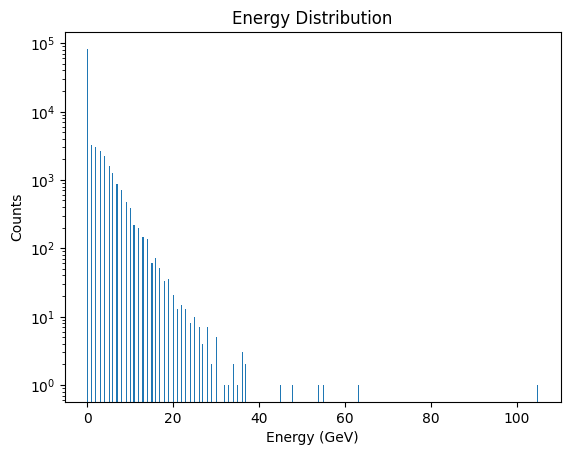

Points above 21.000 GeV: 100


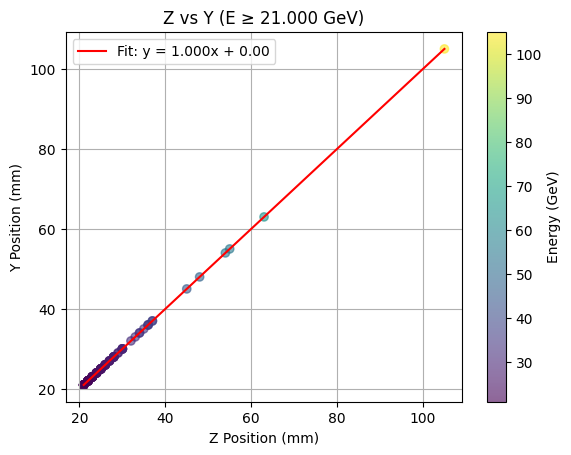

In [75]:
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

file_path = "zdc_cosmic_muons_YZ.edm4hep.root"
events = ur.open(file_path)["events"]

# Load data
data = events.arrays(["HcalFarForwardZDCHits.energy", 
                     "HcalFarForwardZDCHits.position.y", 
                     "HcalFarForwardZDCHits.position.z"], 
                    library="ak")

energy = ak.num(data["HcalFarForwardZDCHits.energy"])
y_pos = ak.num(data["HcalFarForwardZDCHits.position.y"])
z_pos = ak.num(data["HcalFarForwardZDCHits.position.z"])

print("Total hits:", len(energy))
print("Energies (first 10):", energy[:100])

# Plot energy distribution
plt.hist(energy, bins=400)
plt.yscale("log")
plt.xlabel("Energy (GeV)")
plt.ylabel("Counts")
plt.title("Energy Distribution")
plt.show()

# Set threshold dynamically (e.g., 10% of max energy)
threshold = 0.2 * np.max(energy)
mask = energy >= threshold
y_filt, z_filt, e_filt = y_pos[mask], z_pos[mask], energy[mask]

print(f"Points above {threshold:.3f} GeV:", len(z_filt))

# Plot
plt.scatter(z_filt, y_filt, c=e_filt, cmap="viridis", alpha=0.6)
plt.colorbar(label="Energy (GeV)")
plt.xlabel("Z Position (mm)")
plt.ylabel("Y Position (mm)")
plt.title(f"Z vs Y (E ≥ {threshold:.3f} GeV)")

if len(z_filt) > 2:  # Require ≥3 points for fit
    slope, intercept, r_value, _, _ = linregress(z_filt, y_filt)
    z_range = np.linspace(min(z_filt), max(z_filt), 100)
    plt.plot(z_range, slope*z_range + intercept, 'r-', 
             label=f"Fit: y = {slope:.3f}x + {intercept:.2f}")
    plt.legend()

plt.grid()
plt.show()

Found 11252 events meeting criteria (E ≥ 0.0005 GeV, ≥3 hits)


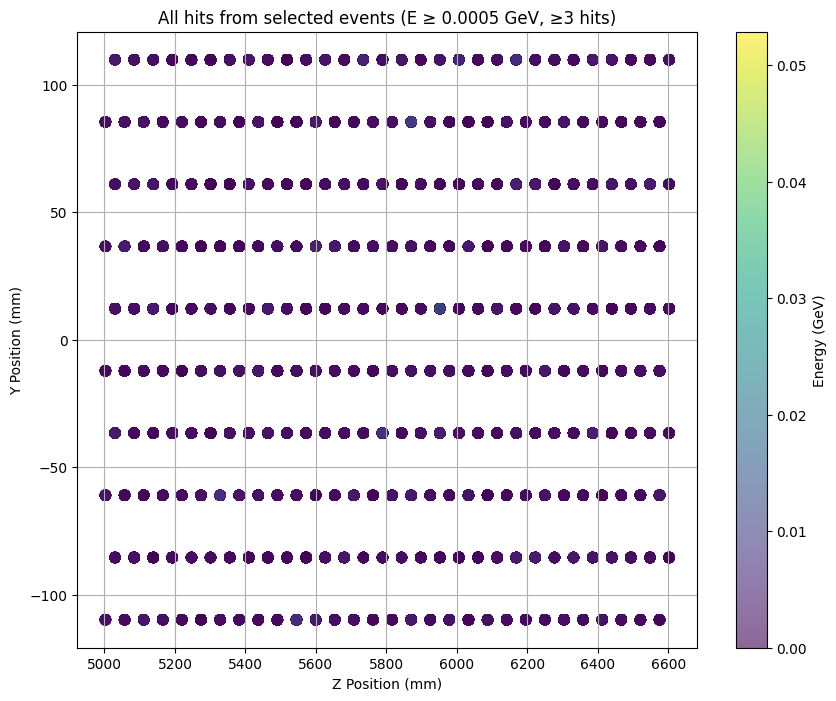

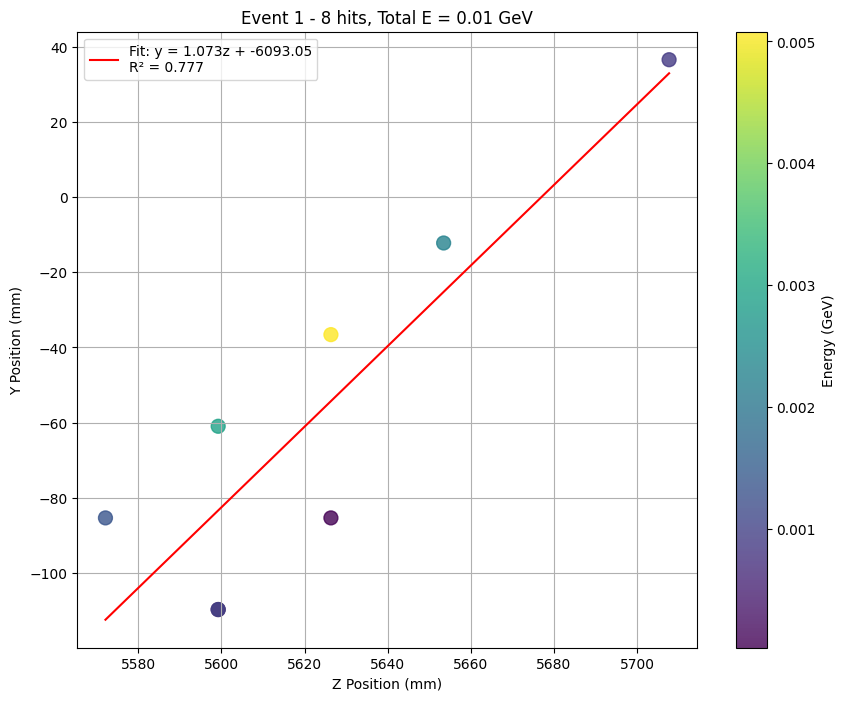

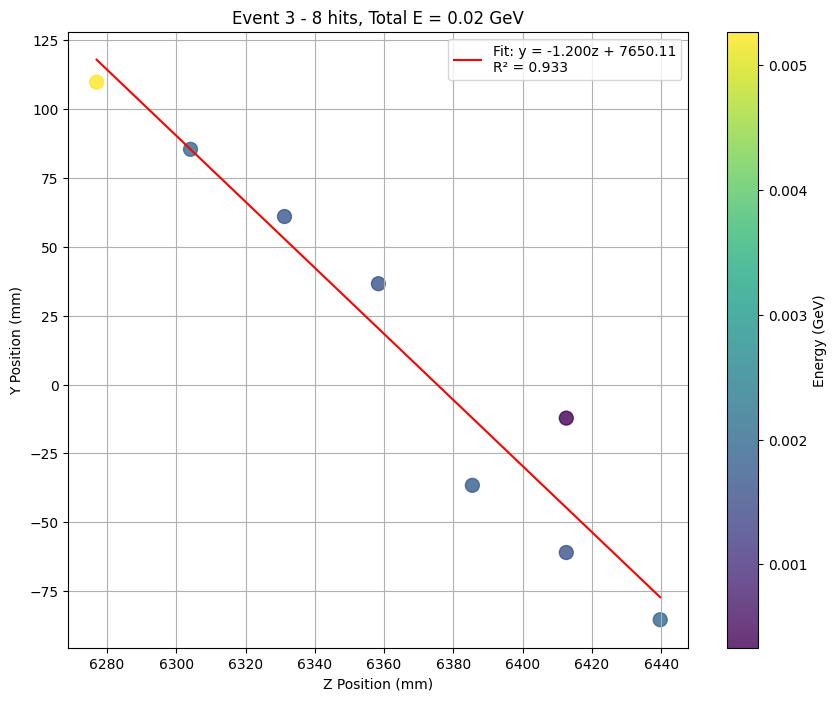

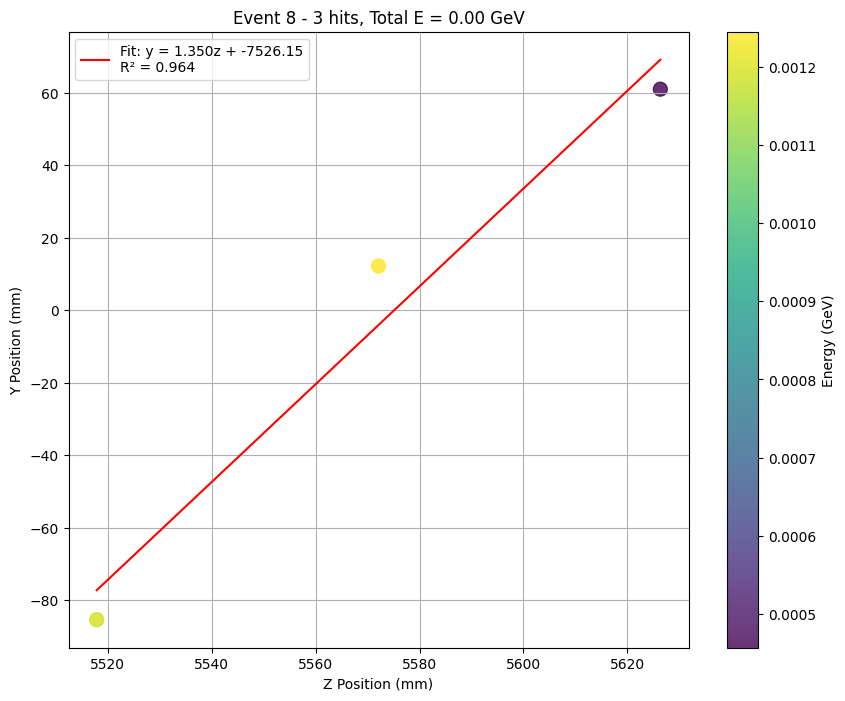

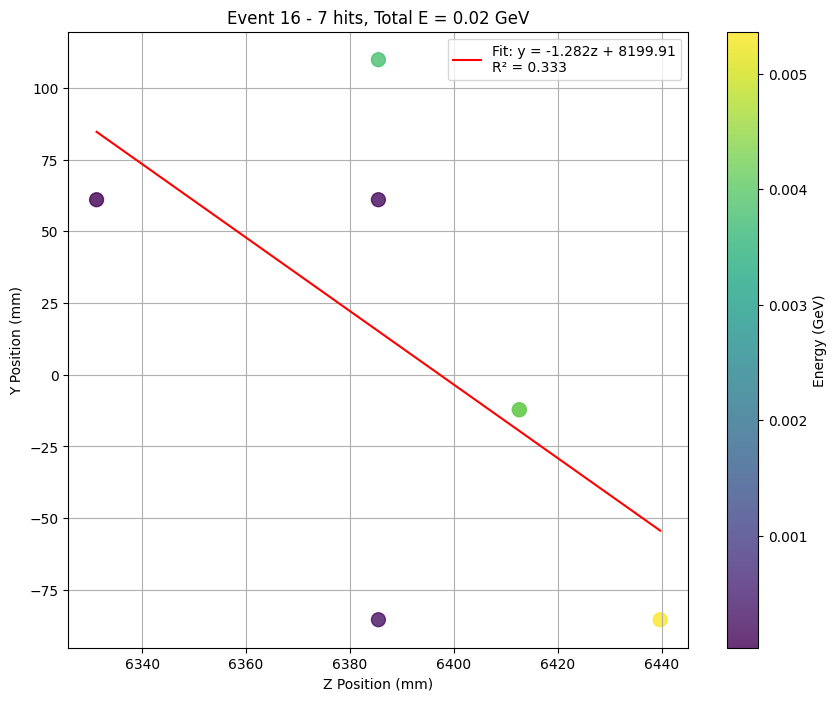

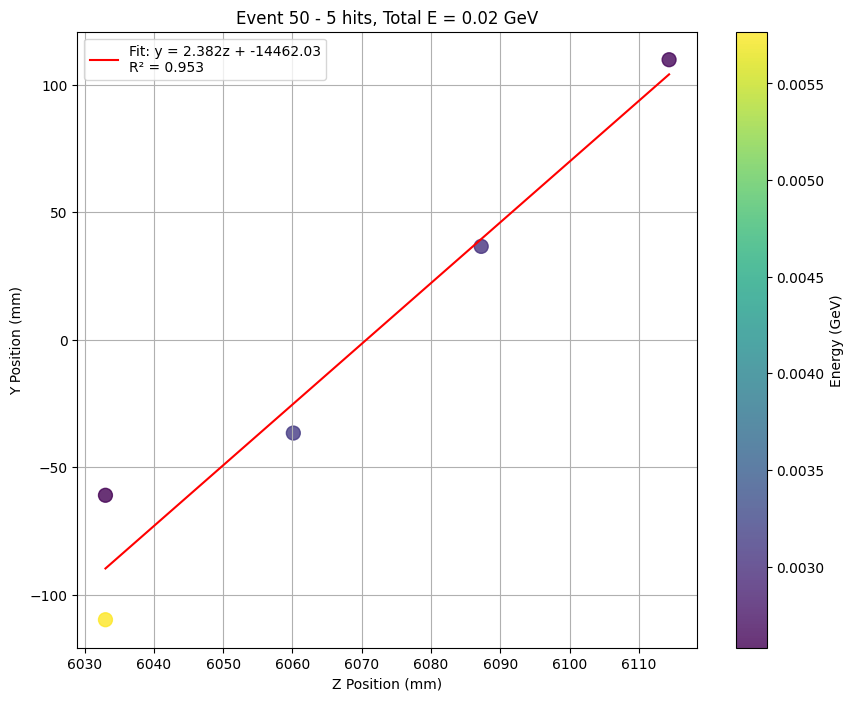

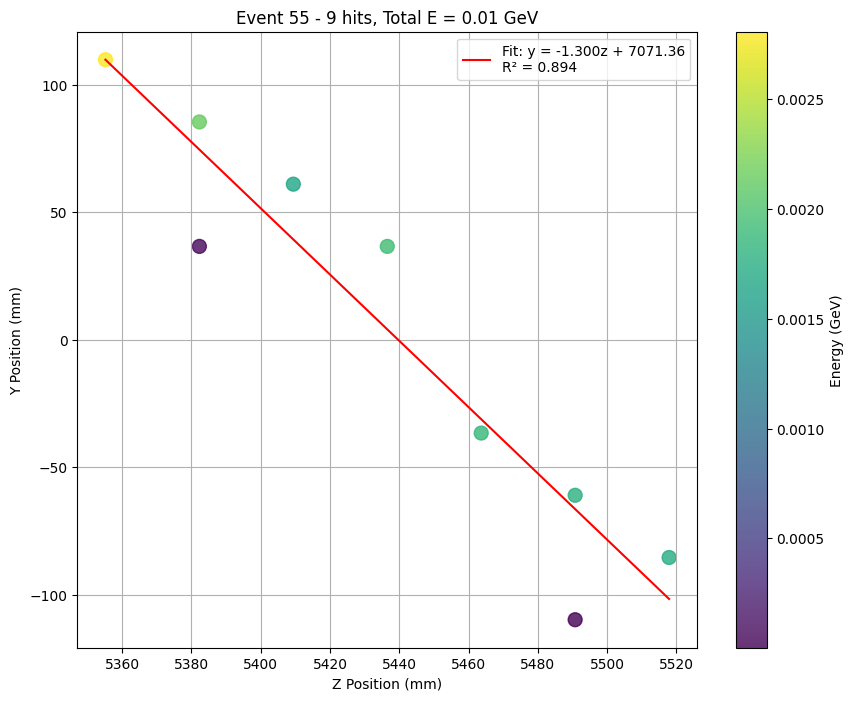

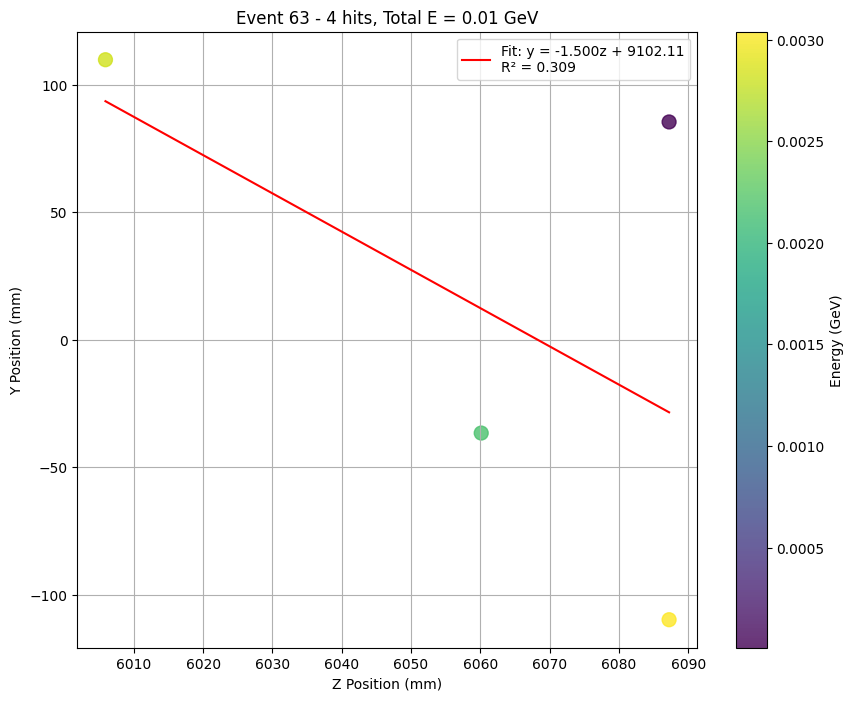

In [1]:
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

file_path = "zdc_cosmic_muons_YZ.edm4hep.root"
events = ur.open(file_path)["events"]

# Load all data at once
data = events.arrays(["HcalFarForwardZDCHits.energy", 
                     "HcalFarForwardZDCHits.position.y", 
                     "HcalFarForwardZDCHits.position.z"], 
                    library="ak")

# Get per-hit information (flattened)
all_energy = ak.flatten(data["HcalFarForwardZDCHits.energy"])
all_y = ak.flatten(data["HcalFarForwardZDCHits.position.y"])
all_z = ak.flatten(data["HcalFarForwardZDCHits.position.z"])

# Get per-event information
event_energy = ak.sum(data["HcalFarForwardZDCHits.energy"], axis=1)
n_hits_per_event = ak.num(data["HcalFarForwardZDCHits.energy"])

# ====== ANALYSIS PARAMETERS ======
MIN_ENERGY = 0.5 / 1000  # GeV - minimum energy for an event to be considered
MIN_HITS = 3       # Minimum number of hits in an event
PLOT_EVENTS = 7    # Number of individual events to plot

# ====== EVENT SELECTION ======
# Create mask for events that meet our criteria
selected_mask = (event_energy >= MIN_ENERGY) & (n_hits_per_event >= MIN_HITS)
selected_indices = np.where(selected_mask)[0]

print(f"Found {len(selected_indices)} events meeting criteria (E ≥ {MIN_ENERGY} GeV, ≥{MIN_HITS} hits)")

# ====== PLOT ALL SELECTED HITS ======
# Get all hits from selected events
selected_energy = []
selected_y = []
selected_z = []

for idx in selected_indices:
    selected_energy.extend(data["HcalFarForwardZDCHits.energy"][idx])
    selected_y.extend(data["HcalFarForwardZDCHits.position.y"][idx])
    selected_z.extend(data["HcalFarForwardZDCHits.position.z"][idx])

plt.figure(figsize=(10, 8))
plt.scatter(selected_z, selected_y, c=selected_energy, 
           cmap="viridis", alpha=0.6, s=50)
plt.colorbar(label="Energy (GeV)")
plt.xlabel("Z Position (mm)")
plt.ylabel("Y Position (mm)")
plt.title(f"All hits from selected events (E ≥ {MIN_ENERGY} GeV, ≥{MIN_HITS} hits)")
plt.grid(True)
plt.show()

# ====== PLOT INDIVIDUAL EVENTS ======
for i, idx in enumerate(selected_indices[:PLOT_EVENTS]):
    event_e = data["HcalFarForwardZDCHits.energy"][idx]
    event_y = data["HcalFarForwardZDCHits.position.y"][idx]
    event_z = data["HcalFarForwardZDCHits.position.z"][idx]
    
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(event_z, event_y, c=event_e, 
                         cmap="viridis", s=100, alpha=0.8)
    plt.colorbar(scatter, label="Energy (GeV)")
    plt.xlabel("Z Position (mm)")
    plt.ylabel("Y Position (mm)")
    plt.title(f"Event {idx} - {len(event_e)} hits, Total E = {sum(event_e):.2f} GeV")
    plt.grid(True)
    
    # Add linear fit if enough points
    if len(event_z) >= 2:
        slope, intercept, r_value, _, _ = linregress(event_z, event_y)
        z_range = np.linspace(min(event_z), max(event_z), 100)
        plt.plot(z_range, slope*z_range + intercept, 'r-', 
                label=f"Fit: y = {slope:.3f}z + {intercept:.2f}\nR² = {r_value**2:.3f}")
        plt.legend()
    
    plt.show()

Text(0, 0.5, 'Counts')

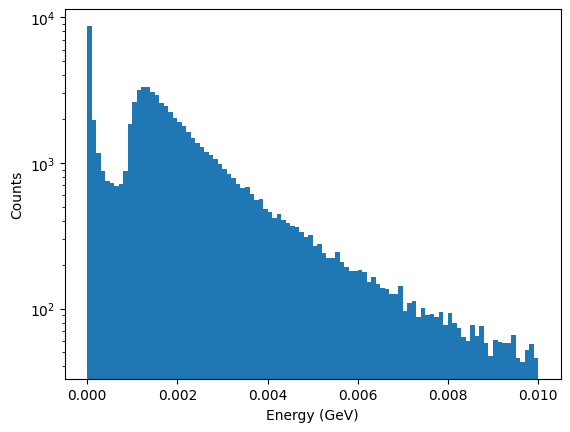

In [68]:
plt.hist(all_e, bins=100, range=[0, 0.01], log=True)  # GeV
plt.xlabel("Energy (GeV)")
plt.ylabel("Counts")

Found 11306 events meeting criteria (E ≥ 5e-05 GeV, ≥3 hits)


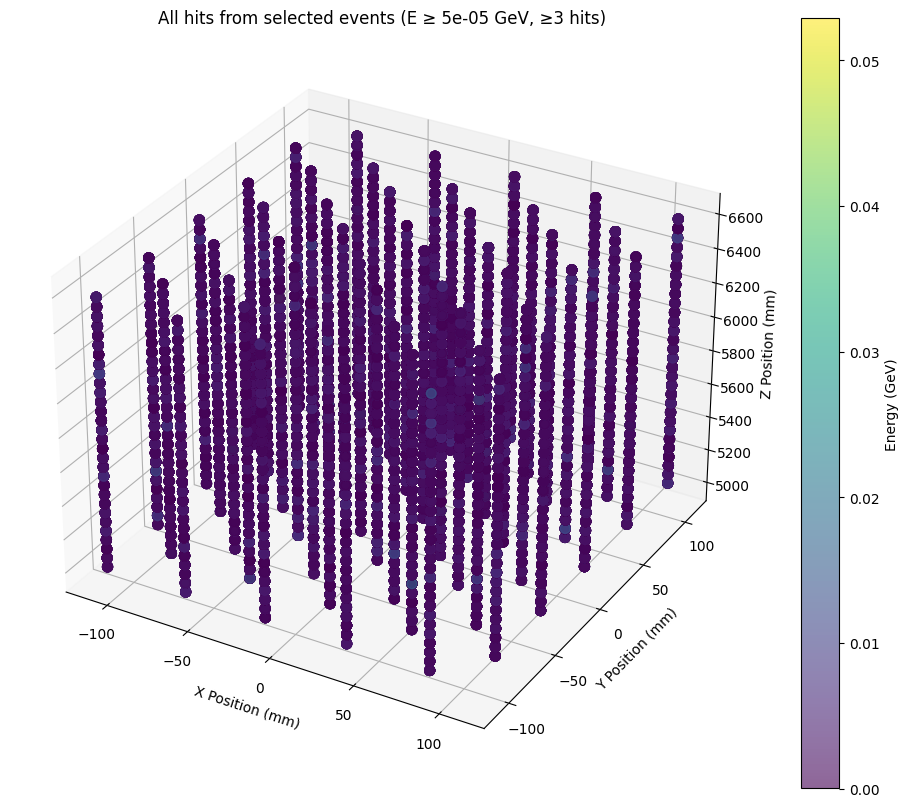

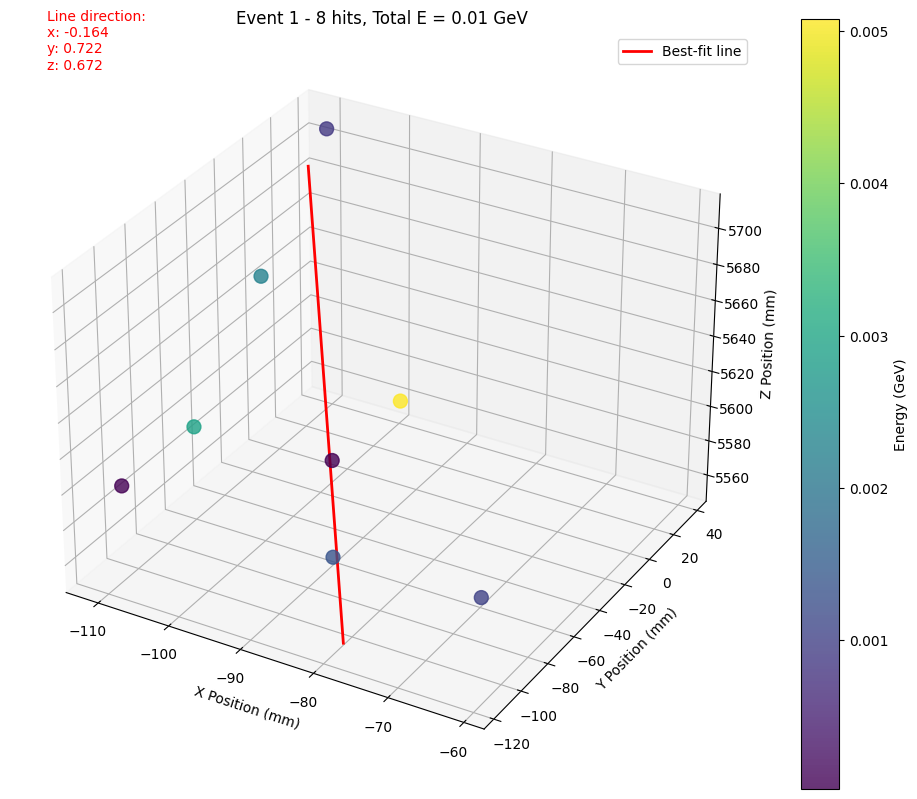

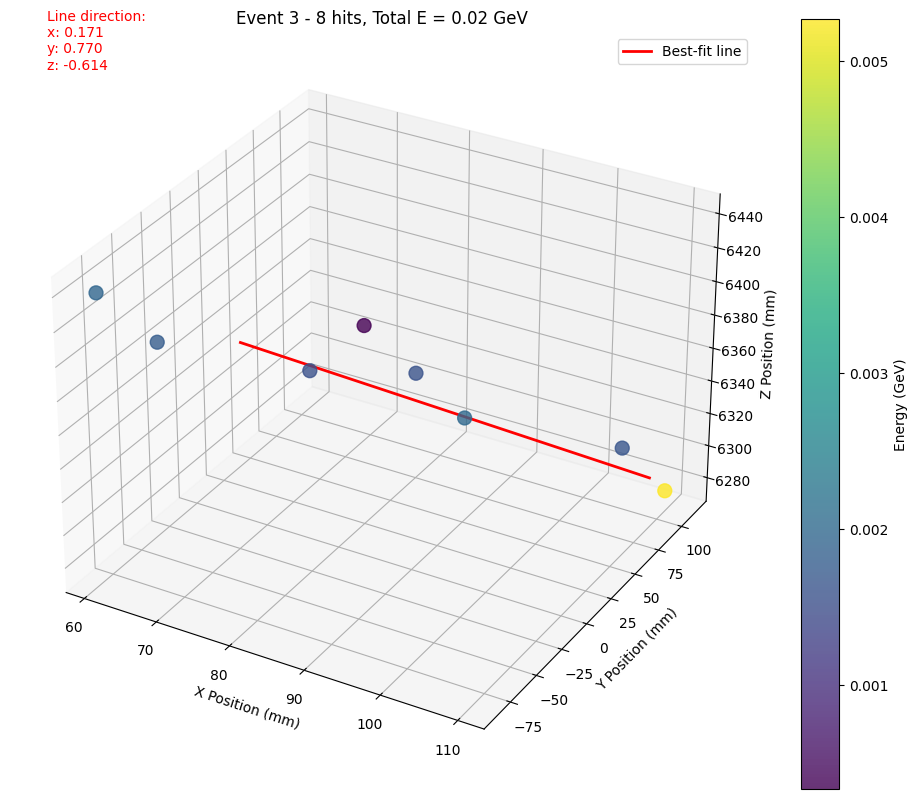

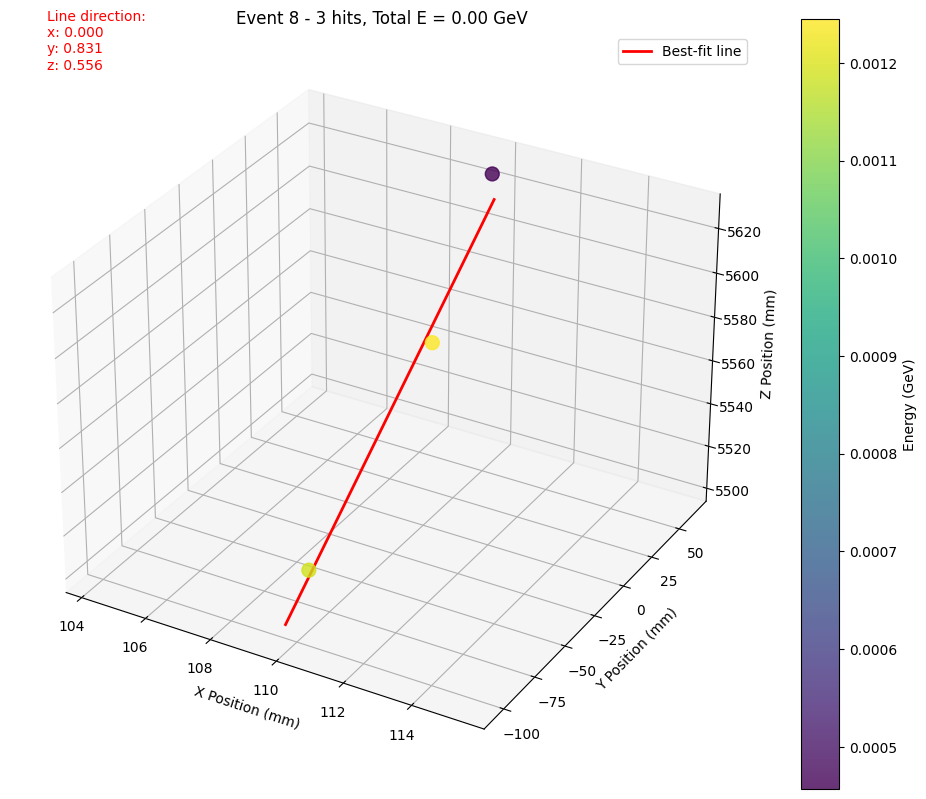

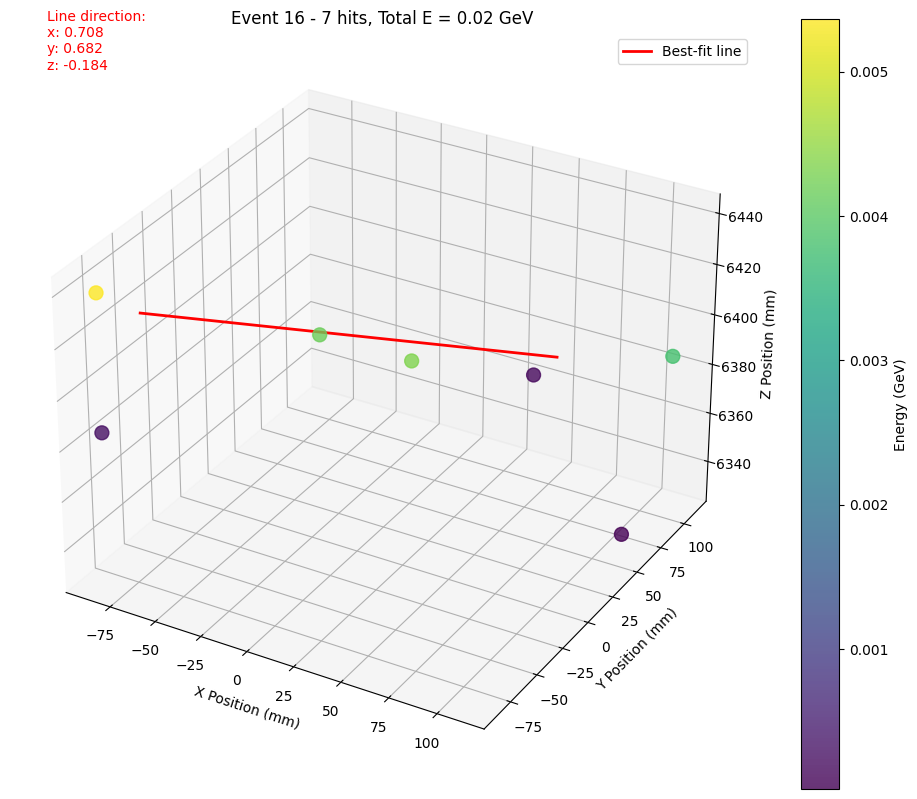

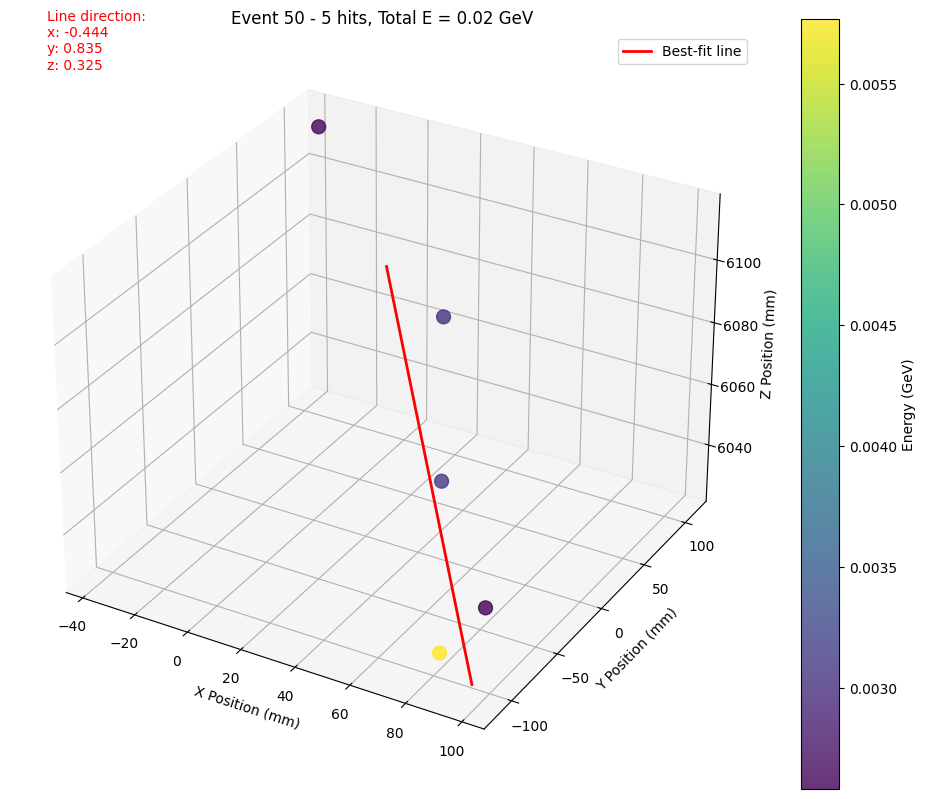

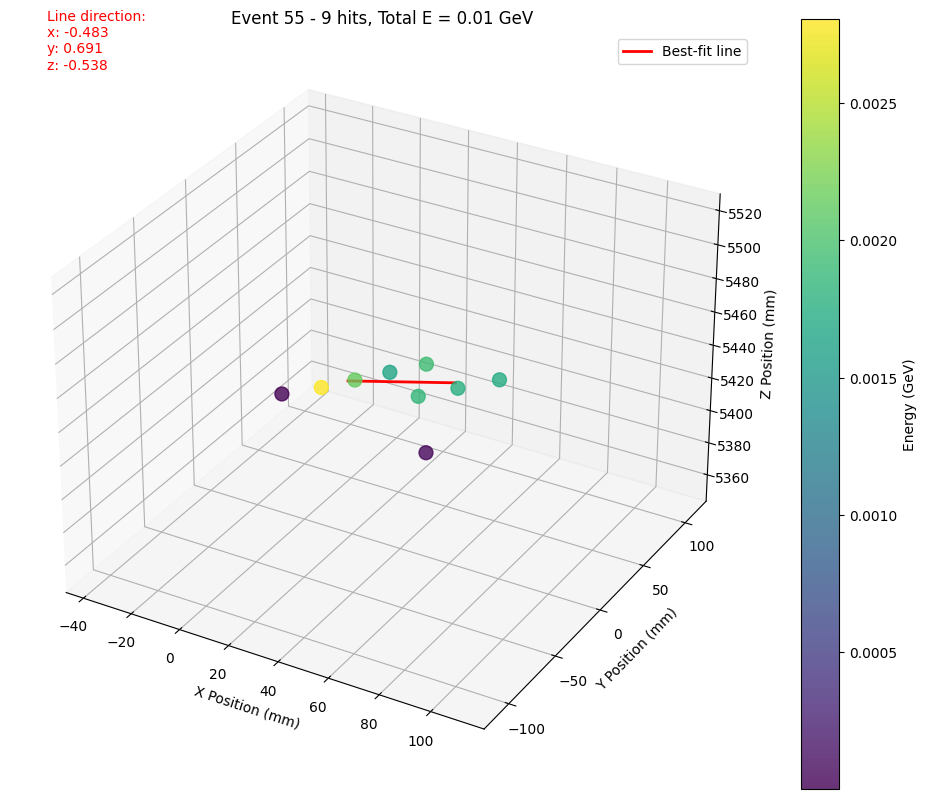

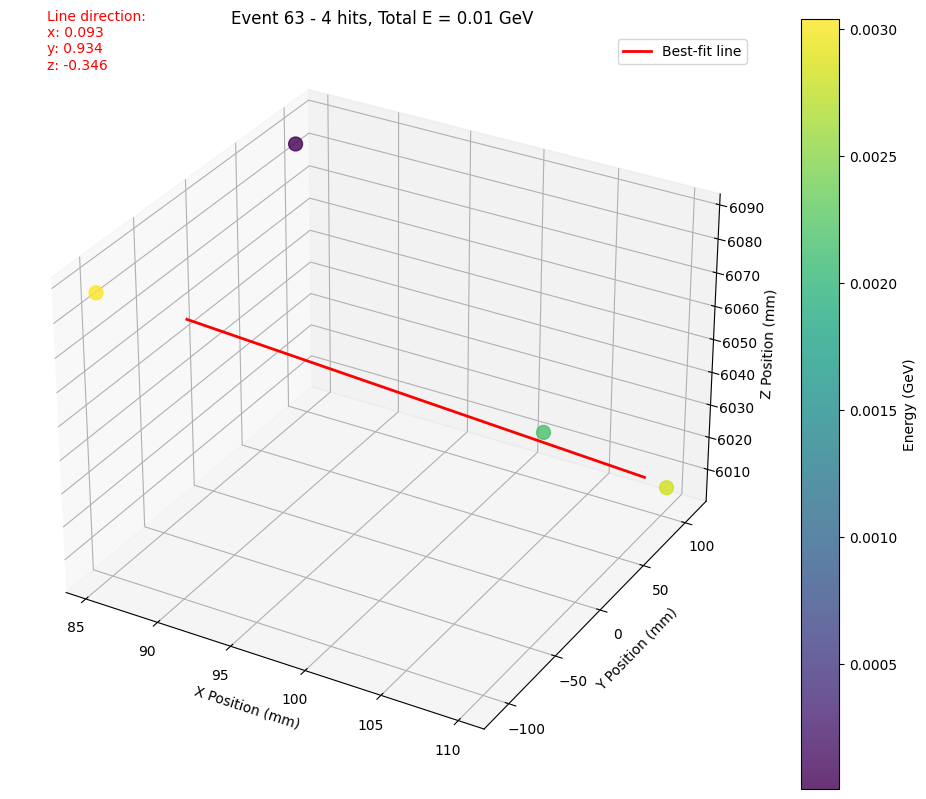

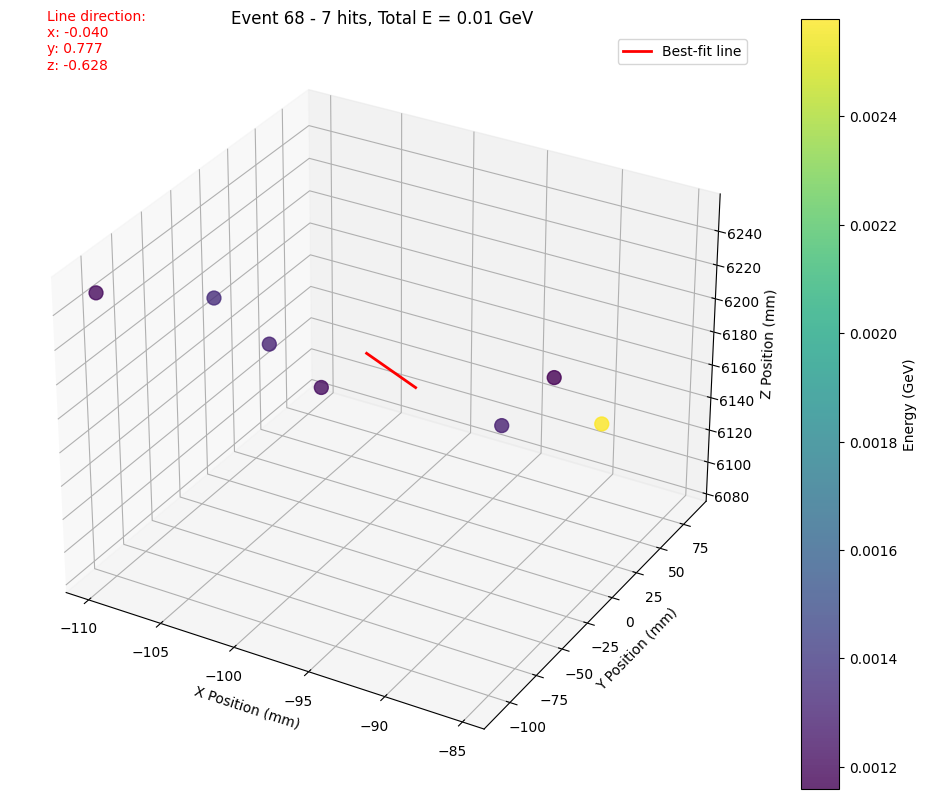

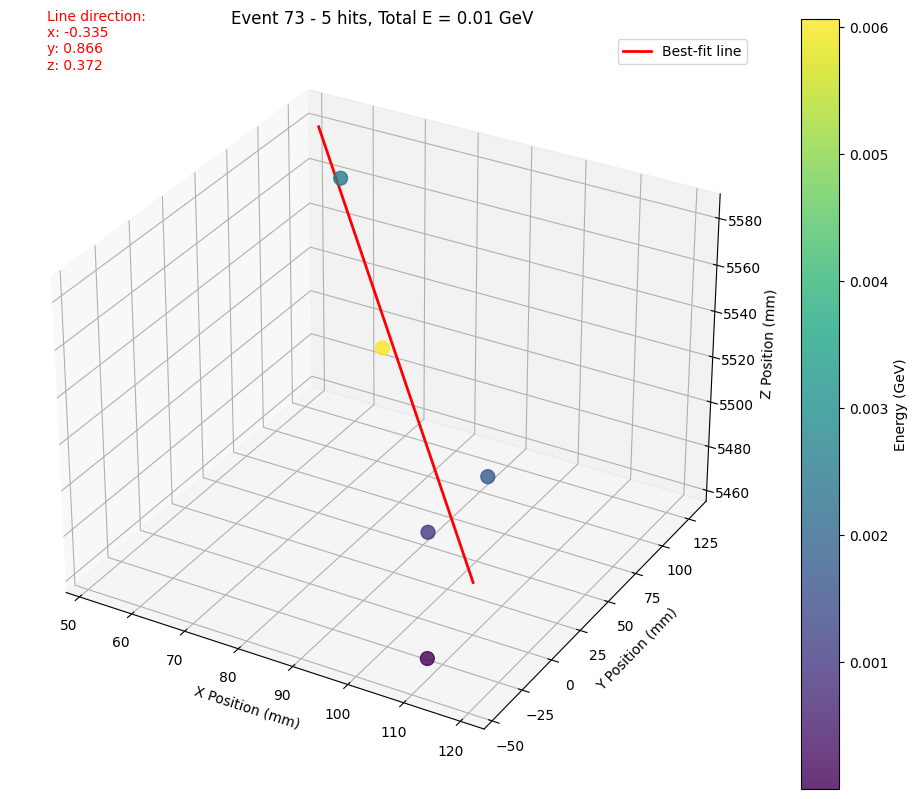

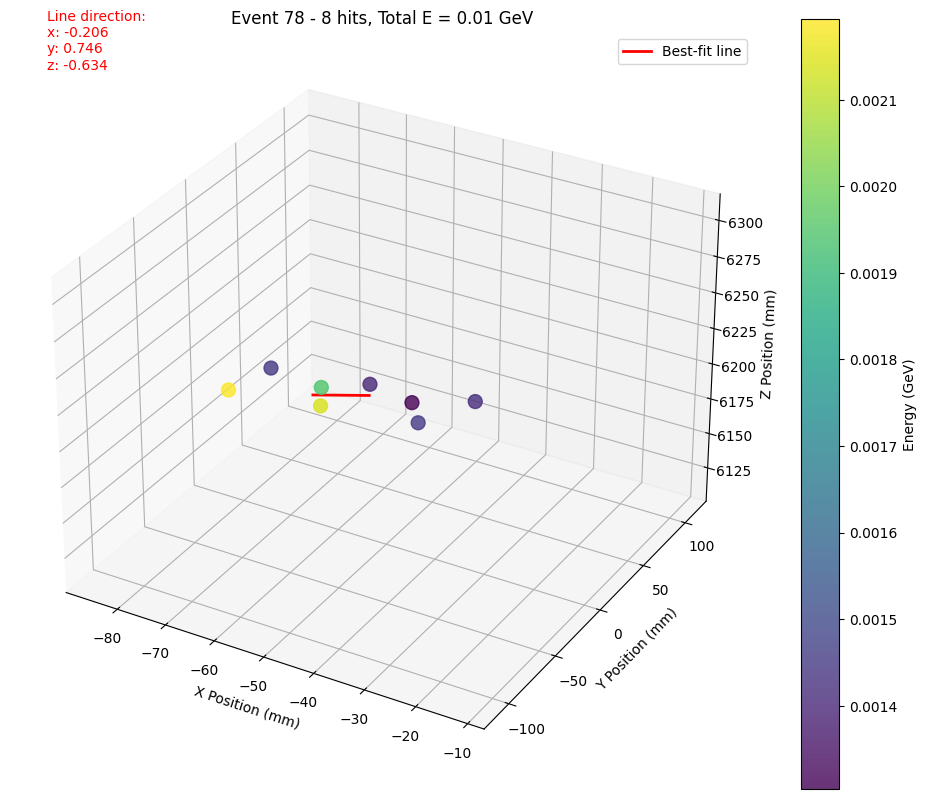

In [16]:
import uproot as ur
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

file_path = "zdc_cosmic_muons_YZ.edm4hep.root"
events = ur.open(file_path)["events"]

# Load all data at once - now including x positions
data = events.arrays(["HcalFarForwardZDCHits.energy", 
                     "HcalFarForwardZDCHits.position.x",
                     "HcalFarForwardZDCHits.position.y", 
                     "HcalFarForwardZDCHits.position.z"], 
                    library="ak")

# Get per-hit information (flattened)
all_energy = ak.flatten(data["HcalFarForwardZDCHits.energy"])
all_x = ak.flatten(data["HcalFarForwardZDCHits.position.x"])
all_y = ak.flatten(data["HcalFarForwardZDCHits.position.y"])
all_z = ak.flatten(data["HcalFarForwardZDCHits.position.z"])

# Get per-event information
event_energy = ak.sum(data["HcalFarForwardZDCHits.energy"], axis=1)
n_hits_per_event = ak.num(data["HcalFarForwardZDCHits.energy"])

# ====== ANALYSIS PARAMETERS ======
MIN_ENERGY = 0.005 / 100   # GeV - minimum energy for an event to be considered
MIN_HITS = 3       # Minimum number of hits in an event
#PLOT_EVENTS = 10    # Number of individual events to plot
PLOT_SPECIFIC_EVENT = 42


# ====== EVENT SELECTION ======
selected_mask = (event_energy >= MIN_ENERGY) & (n_hits_per_event >= MIN_HITS)
selected_indices = np.where(selected_mask)[0]

print(f"Found {len(selected_indices)} events meeting criteria (E ≥ {MIN_ENERGY} GeV, ≥{MIN_HITS} hits)")

# ====== PLOT ALL SELECTED HITS IN 3D ======
selected_energy = []
selected_x = []
selected_y = []
selected_z = []

for idx in selected_indices:
    selected_energy.extend(data["HcalFarForwardZDCHits.energy"][idx])
    selected_x.extend(data["HcalFarForwardZDCHits.position.x"][idx])
    selected_y.extend(data["HcalFarForwardZDCHits.position.y"][idx])
    selected_z.extend(data["HcalFarForwardZDCHits.position.z"][idx])

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(selected_x, selected_y, selected_z, 
                    c=selected_energy, cmap="viridis", alpha=0.6, s=50)
fig.colorbar(scatter, label="Energy (GeV)")
ax.set_xlabel("X Position (mm)")
ax.set_ylabel("Y Position (mm)")
ax.set_zlabel("Z Position (mm)")
ax.set_title(f"All hits from selected events (E ≥ {MIN_ENERGY} GeV, ≥{MIN_HITS} hits)")
plt.show()

# ====== PLOT INDIVIDUAL EVENTS IN 3D ======
for i, idx in enumerate(selected_indices[:PLOT_EVENTS]):
    # Convert ALL arrays to NumPy first
    event_e = ak.to_numpy(data["HcalFarForwardZDCHits.energy"][idx])  # Explicit conversion
    event_x = ak.to_numpy(data["HcalFarForwardZDCHits.position.x"][idx])
    event_y = ak.to_numpy(data["HcalFarForwardZDCHits.position.y"][idx])
    event_z = ak.to_numpy(data["HcalFarForwardZDCHits.position.z"][idx])
    
    fig = plt.figure(figsize=(12, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot hits
    scatter = ax.scatter(event_x, event_y, event_z, 
                        c=event_e, cmap="viridis", s=100, alpha=0.8)
    fig.colorbar(scatter, label="Energy (GeV)")
    ax.set_xlabel("X Position (mm)")
    ax.set_ylabel("Y Position (mm)")
    ax.set_zlabel("Z Position (mm)")
    ax.set_title(f"Event {idx} - {len(event_e)} hits, Total E = {np.sum(event_e):.2f} GeV")
    
    # Line fitting
    if len(event_x) >= 2:
        points = np.column_stack((event_x, event_y, event_z))
        weights = event_e / np.sum(event_e)  # Now using np.sum()
        
        # Weighted PCA
        weighted_mean = np.average(points, axis=0, weights=weights)
        centered = points - weighted_mean
        weighted_points = centered * np.sqrt(weights[:, np.newaxis])
        
        pca = PCA(n_components=1)
        pca.fit(weighted_points)
        direction = pca.components_[0]
        
        # Generate line
        t = np.linspace(-100, 100, 100)
        line_points = weighted_mean + t[:, np.newaxis] * direction
        
        # Plot line
        ax.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2],
               'r-', linewidth=2, label='Best-fit line')
        
        # Add direction info
        info = (f"Line direction:\n"
               f"x: {direction[0]:.3f}\n"
               f"y: {direction[1]:.3f}\n"
               f"z: {direction[2]:.3f}")
        ax.text2D(0.05, 0.95, info, transform=ax.transAxes, color='red')
        ax.legend()
    
    plt.show()

In [ ]:
 t times the momentum, plot vertx against (new momentum)

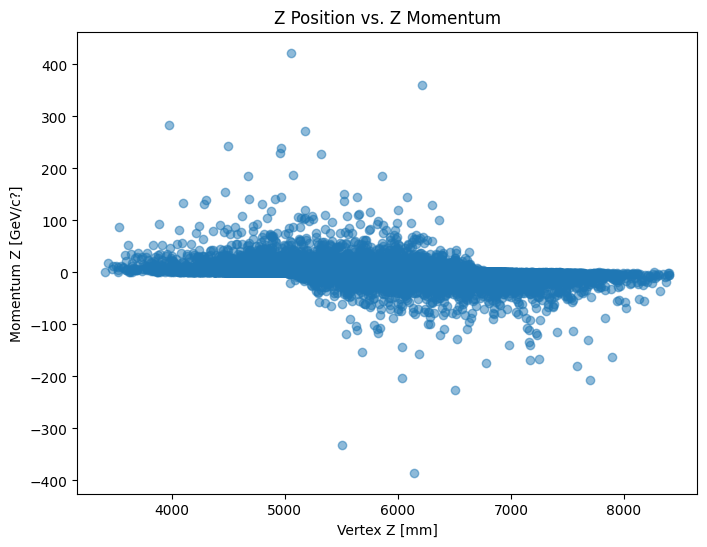

In [13]:
# Example: Z vs. momentum_z
plt.figure(figsize=(8, 6))
plt.scatter(vertex_z, momentum_z, alpha=0.5)
plt.xlabel("Vertex Z [mm]")
plt.ylabel("Momentum Z [GeV/c?]")
plt.title("Z Position vs. Z Momentum")
plt.show()

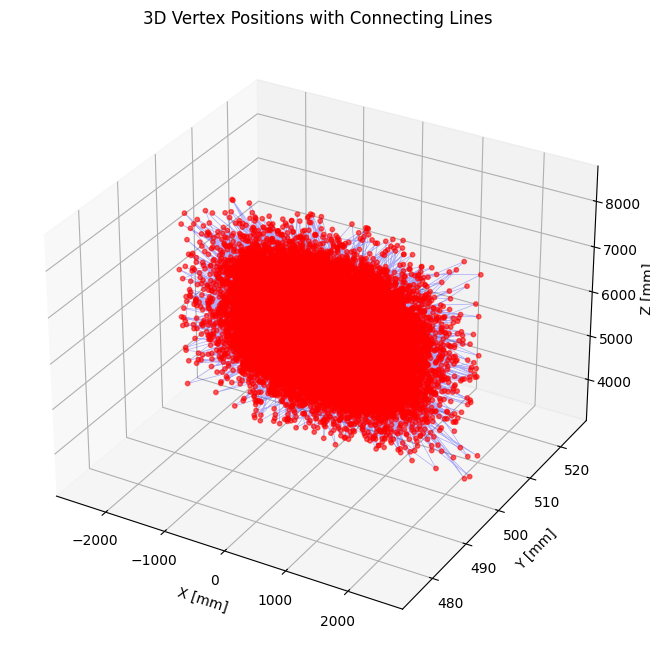

In [14]:
import uproot as ur
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

file_path = "zdc_cosmic_muons_YZ.edm4hep.root"
events = ur.open(file_path)["events"]

# Read vertex positions
gen_status = events["MCParticles/MCParticles.generatorStatus"].array()
vertex_x = events["MCParticles/MCParticles.vertex.x"].array()[gen_status==1].to_numpy()
vertex_y = events["MCParticles/MCParticles.vertex.y"].array()[gen_status==1].to_numpy()
vertex_z = events["MCParticles/MCParticles.vertex.z"].array()[gen_status==1].to_numpy()

# Create figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot vertex points (red dots)
ax.scatter(vertex_x, vertex_y, vertex_z, c='red', s=10, alpha=0.6)

# ---- NEW: Add connecting lines ----
# Sort points (if needed) to connect them in a meaningful order
# Here we just connect them in order of appearance (modify if you want a specific order)
ax.plot(vertex_x, vertex_y, vertex_z, color='blue', alpha=0.3, linewidth=0.5)

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
ax.set_title('3D Vertex Positions with Connecting Lines')
plt.show()

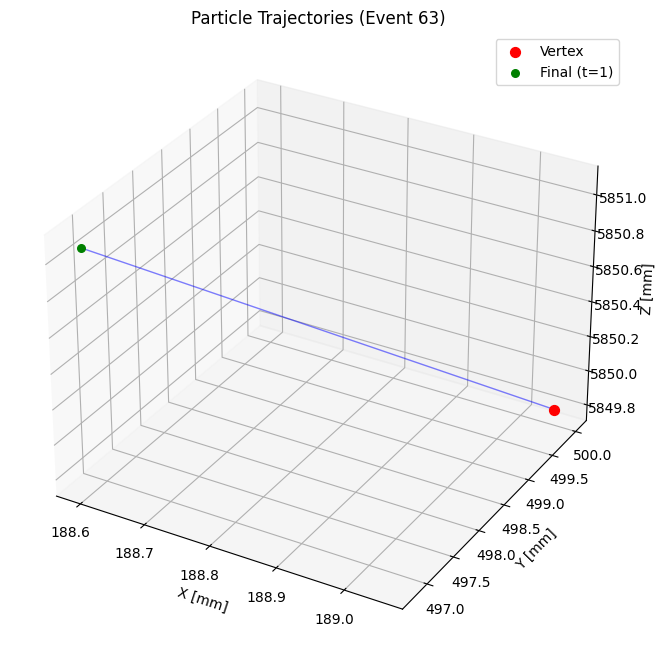

In [27]:
import uproot as ur
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


file_path = "zdc_cosmic_muons_YZ.edm4hep.root"
events = ur.open(file_path)["events"]

# Choose an event (try different indices if you get only one point)
event_index = 63

# Read data for ONE event
gen_status = events["MCParticles/MCParticles.generatorStatus"].array()[event_index]
vertex_x = events["MCParticles/MCParticles.vertex.x"].array()[event_index][gen_status == 1].to_numpy()
vertex_y = events["MCParticles/MCParticles.vertex.y"].array()[event_index][gen_status == 1].to_numpy()
vertex_z = events["MCParticles/MCParticles.vertex.z"].array()[event_index][gen_status == 1].to_numpy()
momentum_x = events["MCParticles/MCParticles.momentum.x"].array()[event_index][gen_status == 1].to_numpy()
momentum_y = events["MCParticles/MCParticles.momentum.y"].array()[event_index][gen_status == 1].to_numpy()
momentum_z = events["MCParticles/MCParticles.momentum.z"].array()[event_index][gen_status == 1].to_numpy()

# Time values (adjust range/step as needed)
t_values = np.linspace(0, 1, 10)  # Fewer steps = faster plotting

# Create figure
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot for each particle in the event
for i in range(len(vertex_x)):
    # Calculate vertex + momentum * t
    x_points = vertex_x[i] + momentum_x[i] * t_values
    y_points = vertex_y[i] + momentum_y[i] * t_values
    z_points = vertex_z[i] + momentum_z[i] * t_values
    
    # Plot trajectory line
    ax.plot(x_points, y_points, z_points, 
            color='blue', alpha=0.5, linewidth=1)
    
    # Mark original vertex (red) and final point (green)
    ax.scatter(vertex_x[i], vertex_y[i], vertex_z[i], 
               c='red', s=50, label="Vertex" if i == 0 else "")
    ax.scatter(x_points[-1], y_points[-1], z_points[-1], 
               c='green', s=30, label="Final (t=1)" if i == 0 else "")

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
ax.set_title(f'Particle Trajectories (Event {event_index})')
ax.legend()
plt.show()

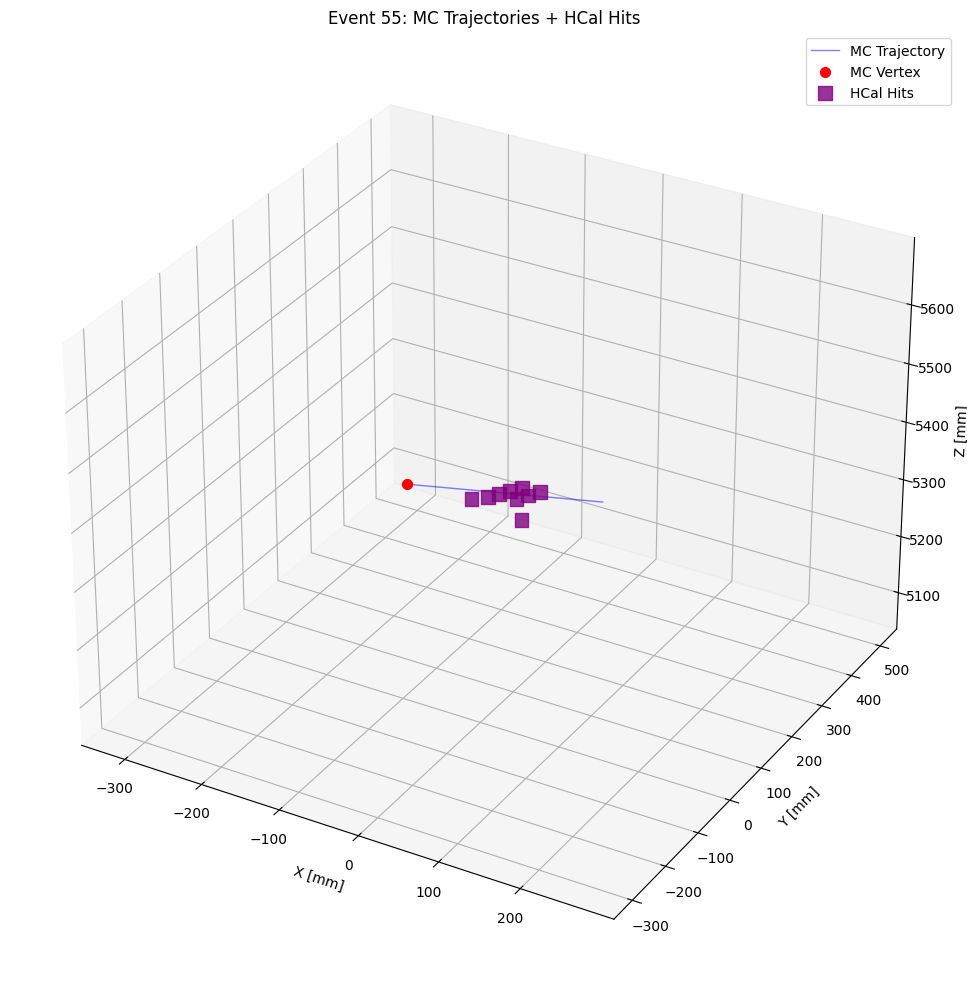

In [33]:
import uproot as ur
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


file_path = "zdc_cosmic_muons_YZ.edm4hep.root"
events = ur.open(file_path)["events"]

# Choose an event
event_index = 55

# ===== 1. MC PARTICLES =====
gen_status = events["MCParticles/MCParticles.generatorStatus"].array()[event_index]
vertex_x = events["MCParticles/MCParticles.vertex.x"].array()[event_index][gen_status == 1].to_numpy()
vertex_y = events["MCParticles/MCParticles.vertex.y"].array()[event_index][gen_status == 1].to_numpy()
vertex_z = events["MCParticles/MCParticles.vertex.z"].array()[event_index][gen_status == 1].to_numpy()
momentum_x = events["MCParticles/MCParticles.momentum.x"].array()[event_index][gen_status == 1].to_numpy()
momentum_y = events["MCParticles/MCParticles.momentum.y"].array()[event_index][gen_status == 1].to_numpy()
momentum_z = events["MCParticles/MCParticles.momentum.z"].array()[event_index][gen_status == 1].to_numpy()

# ===== 2. HCAL HITS =====
hcal_x = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.x"].array()[event_index].to_numpy()
hcal_y = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.y"].array()[event_index].to_numpy()
hcal_z = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.z"].array()[event_index].to_numpy()

# Time values
t_values = np.linspace(0, 100, 10)

# Create figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# ===== 3. PLOT MC TRAJECTORIES =====
for i in range(len(vertex_x)):
    x_points = vertex_x[i] + momentum_x[i] * t_values
    y_points = vertex_y[i] + momentum_y[i] * t_values
    z_points = vertex_z[i] + momentum_z[i] * t_values
    
    ax.plot(x_points, y_points, z_points, 
            color='blue', alpha=0.5, linewidth=1, 
            label="MC Trajectory" if i == 0 else "")
    ax.scatter(vertex_x[i], vertex_y[i], vertex_z[i], 
               c='red', s=50, label="MC Vertex" if i == 0 else "")

# ===== 4. PLOT HCAL HITS =====
ax.scatter(hcal_x, hcal_y, hcal_z, 
           c='purple', marker='s', s=100, 
           alpha=0.8, label="HCal Hits")

#ax.set_xlim(-1000, 1000)  # Adjust based on your detector geometry
#ax.set_ylim(-1000, 1000)
#ax.set_zlim(-10000, 10000)  # Z is usually the beam axis

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
ax.set_title(f'Event {event_index}: MC Trajectories + HCal Hits')
ax.legend()
plt.tight_layout()
plt.show()

In [ ]:
calculate for the data of the angle phi and theta using jays code, and plot the og best fit line onto the new and compare them.

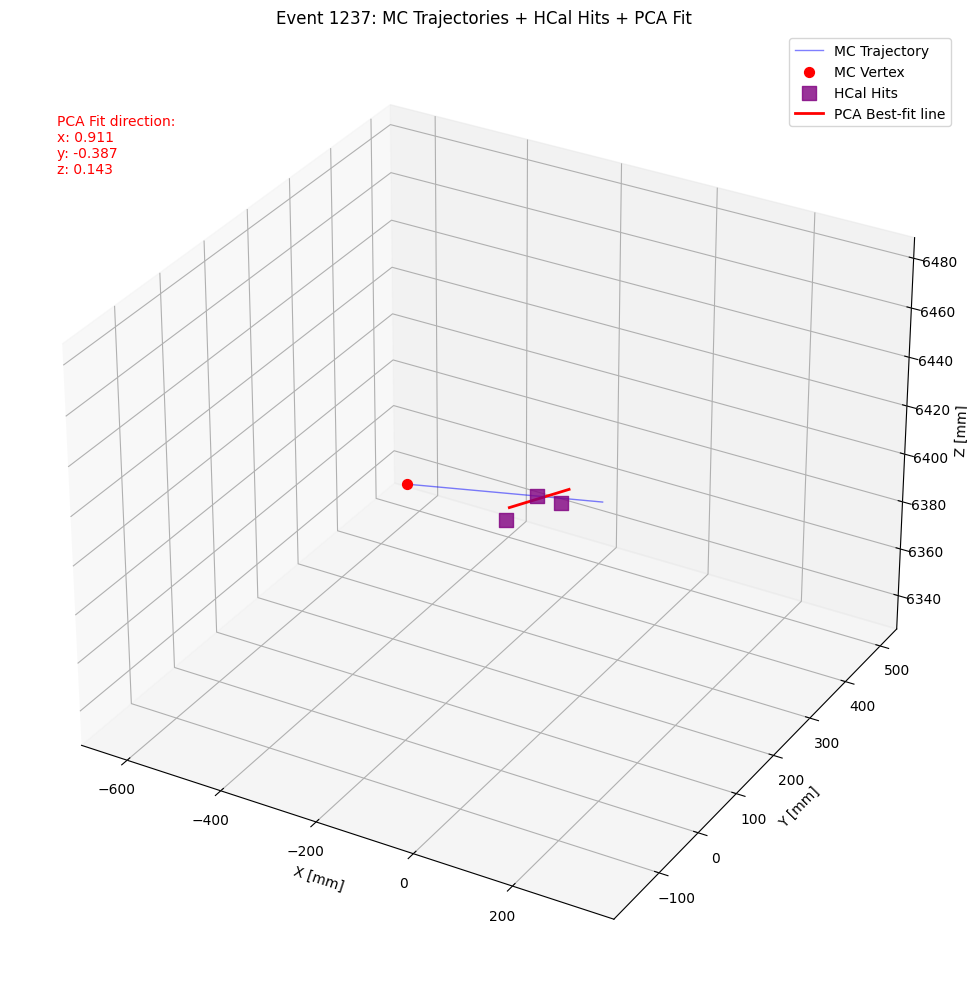

In [4]:
import uproot as ur
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import awkward as ak
from sklearn.decomposition import PCA


file_path = "zdc_cosmic_muons_YZ.edm4hep.root"
events = ur.open(file_path)["events"]

# Choose an event
event_index = 1237

# ===== 1. MC PARTICLES =====
gen_status = events["MCParticles/MCParticles.generatorStatus"].array()[event_index]
vertex_x = events["MCParticles/MCParticles.vertex.x"].array()[event_index][gen_status == 1].to_numpy()
vertex_y = events["MCParticles/MCParticles.vertex.y"].array()[event_index][gen_status == 1].to_numpy()
vertex_z = events["MCParticles/MCParticles.vertex.z"].array()[event_index][gen_status == 1].to_numpy()
momentum_x = events["MCParticles/MCParticles.momentum.x"].array()[event_index][gen_status == 1].to_numpy()
momentum_y = events["MCParticles/MCParticles.momentum.y"].array()[event_index][gen_status == 1].to_numpy()
momentum_z = events["MCParticles/MCParticles.momentum.z"].array()[event_index][gen_status == 1].to_numpy()

# ===== 2. HCAL HITS =====
hcal_x = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.x"].array()[event_index].to_numpy()
hcal_y = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.y"].array()[event_index].to_numpy()
hcal_z = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.z"].array()[event_index].to_numpy()
hcal_e = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.energy"].array()[event_index].to_numpy()

# Time values
t_values = np.linspace(0, 100, 10)

# Create figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# ===== 3. PLOT MC TRAJECTORIES =====
for i in range(len(vertex_x)):
    x_points = vertex_x[i] + momentum_x[i] * t_values
    y_points = vertex_y[i] + momentum_y[i] * t_values
    z_points = vertex_z[i] + momentum_z[i] * t_values
    
    ax.plot(x_points, y_points, z_points, 
            color='blue', alpha=0.5, linewidth=1, 
            label="MC Trajectory" if i == 0 else "")
    ax.scatter(vertex_x[i], vertex_y[i], vertex_z[i], 
               c='red', s=50, label="MC Vertex" if i == 0 else "")

# ===== 4. PLOT HCAL HITS =====
scatter = ax.scatter(hcal_x, hcal_y, hcal_z, 
           c='purple', marker='s', s=100, 
           alpha=0.8, label="HCal Hits")

# ===== 5. ADD BEST-FIT LINE FROM CELL 1 METHOD =====
if len(hcal_x) >= 2:
    points = np.column_stack((hcal_x, hcal_y, hcal_z))
    weights = hcal_e / np.sum(hcal_e)
    
    # Weighted PCA
    weighted_mean = np.average(points, axis=0, weights=weights)
    centered = points - weighted_mean
    weighted_points = centered * np.sqrt(weights[:, np.newaxis])
    
    pca = PCA(n_components=1)
    pca.fit(weighted_points)
    direction = pca.components_[0]
    
    # Generate line
    t = np.linspace(-100, 100, 100)
    line_points = weighted_mean + t[:, np.newaxis] * direction
    
    # Plot line
    ax.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2],
           'r-', linewidth=2, label='PCA Best-fit line')
    
    # Add direction info
    info = (f"PCA Fit direction:\n"
           f"x: {direction[0]:.3f}\n"
           f"y: {direction[1]:.3f}\n"
           f"z: {direction[2]:.3f}")
    ax.text2D(0.05, 0.85, info, transform=ax.transAxes, color='red')

#ax.set_xlim(-1000, 1000)  # Adjust based on your detector geometry
#ax.set_ylim(-1000, 1000)
#ax.set_zlim(-10000, 10000)  # Z is usually the beam axis

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
ax.set_title(f'Event {event_index}: MC Trajectories + HCal Hits + PCA Fit')
ax.legend()
plt.tight_layout()
plt.show()

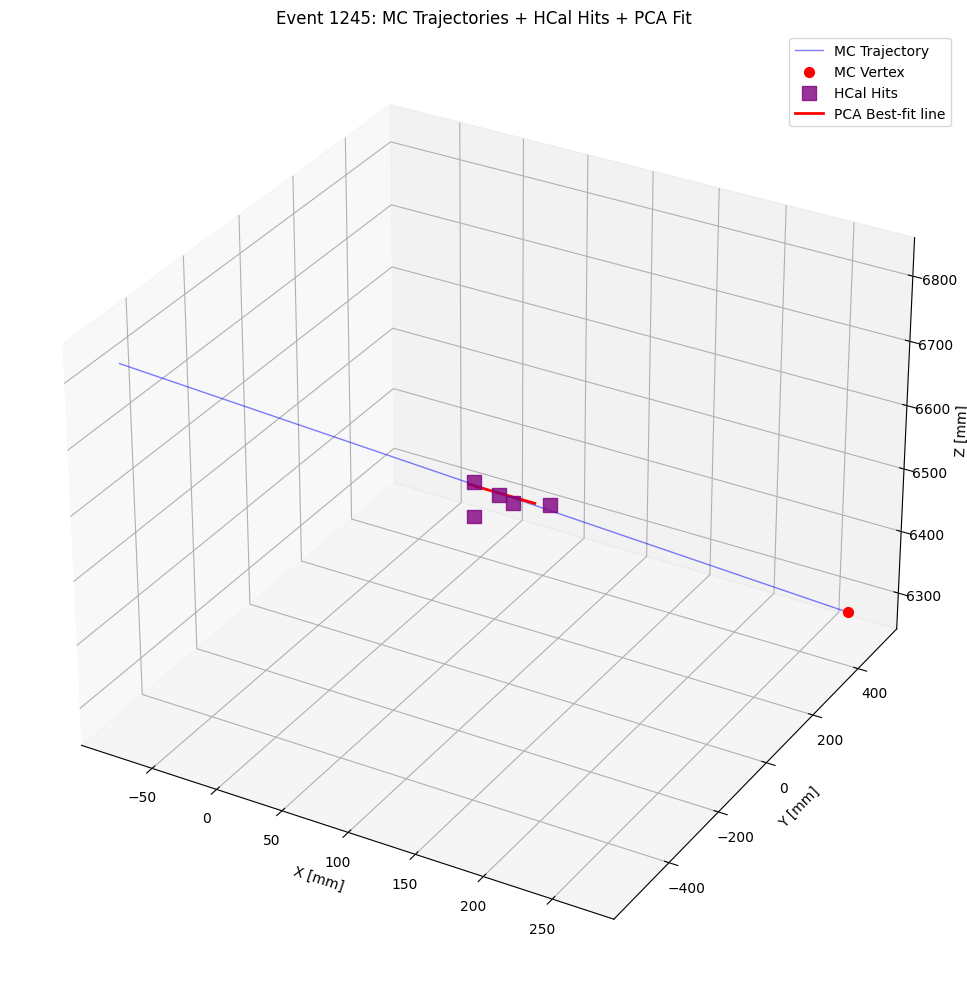


MC Truth Angles:
Theta (θ): 63.84°
Phi (φ): -108.54°

Reconstructed Angles:
Theta (θ): 65.35°
Phi (φ): -94.61°

Angular Differences:
Δθ: 1.51°
Δφ: 13.92°


In [35]:
import uproot as ur
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import awkward as ak
from sklearn.decomposition import PCA

file_path = "zdc_cosmic_muons_YZ.edm4hep.root"
events = ur.open(file_path)["events"]

# Choose an event
event_index = 1245

# ===== 1. MC PARTICLES =====
gen_status = events["MCParticles/MCParticles.generatorStatus"].array()[event_index]
vertex_x = events["MCParticles/MCParticles.vertex.x"].array()[event_index][gen_status == 1].to_numpy()
vertex_y = events["MCParticles/MCParticles.vertex.y"].array()[event_index][gen_status == 1].to_numpy()
vertex_z = events["MCParticles/MCParticles.vertex.z"].array()[event_index][gen_status == 1].to_numpy()
momentum_x = events["MCParticles/MCParticles.momentum.x"].array()[event_index][gen_status == 1].to_numpy()
momentum_y = events["MCParticles/MCParticles.momentum.y"].array()[event_index][gen_status == 1].to_numpy()
momentum_z = events["MCParticles/MCParticles.momentum.z"].array()[event_index][gen_status == 1].to_numpy()

# Calculate MC truth angles
mc_theta = np.degrees(np.arccos(abs(momentum_z)/np.sqrt(momentum_x**2 + momentum_y**2 + momentum_z**2)))
mc_phi = np.degrees(np.arctan2(momentum_y, momentum_x))

# ===== 2. HCAL HITS =====
hcal_x = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.x"].array()[event_index].to_numpy()
hcal_y = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.y"].array()[event_index].to_numpy()
hcal_z = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.z"].array()[event_index].to_numpy()
hcal_e = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.energy"].array()[event_index].to_numpy()

# Flip z-coordinates to make PCA naturally point downward
hcal_z_flipped = -hcal_z  # or use: hcal_z_flipped = hcal_z.max() - hcal_z
# Time values
t_values = np.linspace(0, 100, 10)

# Create figure
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# ===== 3. PLOT MC TRAJECTORIES =====
for i in range(len(vertex_x)):
    x_points = vertex_x[i] + momentum_x[i] * t_values
    y_points = vertex_y[i] + momentum_y[i] * t_values
    z_points = vertex_z[i] + momentum_z[i] * t_values
    
    ax.plot(x_points, y_points, z_points, 
            color='blue', alpha=0.5, linewidth=1, 
            label="MC Trajectory" if i == 0 else "")
    ax.scatter(vertex_x[i], vertex_y[i], vertex_z[i], 
               c='red', s=50, label="MC Vertex" if i == 0 else "")

# ===== 4. PLOT HCAL HITS =====
scatter = ax.scatter(hcal_x, hcal_y, hcal_z, 
           c='purple', marker='s', s=100, 
           alpha=0.8, label="HCal Hits")

# ===== 5. PCA FIT AND ANGLE CALCULATION =====
if len(hcal_x) >= 2:
    # Use flipped z-coordinates for PCA
    points = np.column_stack((hcal_x, hcal_y, hcal_z_flipped))
    weights = hcal_e / np.sum(hcal_e)
    
    # Weighted PCA
    weighted_mean = np.average(points, axis=0, weights=weights)
    centered = points - weighted_mean
    weighted_points = centered * np.sqrt(weights[:, np.newaxis])
    
    pca = PCA(n_components=1)
    pca.fit(weighted_points)
    direction = pca.components_[0]
    
    # Ensure consistent direction (cosmic rays come from above)
    if direction[2] > 0:
        direction *= -1
    
    # Calculate reconstructed angles
    reco_theta = np.degrees(np.arccos(abs(direction[2])/np.linalg.norm(direction)))
    reco_phi = np.degrees(np.arctan2(direction[1], direction[0]))
    
    # Generate line (using original z-coordinates for plotting)
    t = np.linspace(-100, 100, 100)
    line_points = weighted_mean + t[:, np.newaxis] * direction
    line_points[:, 2] = -line_points[:, 2]  # Flip back for correct visualization
    
    # Plot line
    ax.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2],
           'r-', linewidth=2, label='PCA Best-fit line')

ax.set_xlabel('X [mm]')
ax.set_ylabel('Y [mm]')
ax.set_zlabel('Z [mm]')
ax.set_title(f'Event {event_index}: MC Trajectories + HCal Hits + PCA Fit')
ax.legend()
plt.tight_layout()
plt.show()

# Print angles to console
print(f"\nMC Truth Angles:")
print(f"Theta (θ): {mc_theta[0]:.2f}°")
print(f"Phi (φ): {mc_phi[0]:.2f}°")

if len(hcal_x) >= 2:
    print(f"\nReconstructed Angles:")
    print(f"Theta (θ): {reco_theta:.2f}°")
    print(f"Phi (φ): {reco_phi:.2f}°")
    print(f"\nAngular Differences:")
    print(f"Δθ: {abs(reco_theta - mc_theta[0]):.2f}°")
    print(f"Δφ: {abs(reco_phi - mc_phi[0]):.2f}°")

In [47]:
arrays={}
arrays['muon']=ur.open(f"zdc_cosmic_muons_YZ.edm4hep.root:events").arrays()
len(arrays['muon']['HcalFarForwardZDCHits.position.z'])

100000


Event  Status     MC θ     MC φ     Reco θ   Reco φ   Hits  Details             
--------------------------------------------------------------------------------
0      skipped    47.43    -79.91   N/A      N/A      0     <2 hits (0 hits)    
1      processed  48.30    -66.72   47.81    102.81   8                         
2      skipped    88.22    -114.28  N/A      N/A      0     <2 hits (0 hits)    
3      processed  54.89    -99.09   52.09    -102.49  8                         
4      skipped    60.08    -123.54  N/A      N/A      0     <2 hits (0 hits)    
5      skipped    65.99    -125.93  N/A      N/A      0     <2 hits (0 hits)    
6      skipped    59.94    -79.78   N/A      N/A      0     <2 hits (0 hits)    
7      skipped    69.35    -47.94   N/A      N/A      1     <2 hits (1 hits)    
8      processed  44.42    -101.21  56.23    90.00    3                         
9      skipped    78.61    -105.99  N/A      N/A      0     <2 hits (0 hits)    
10     skipped    88.87    

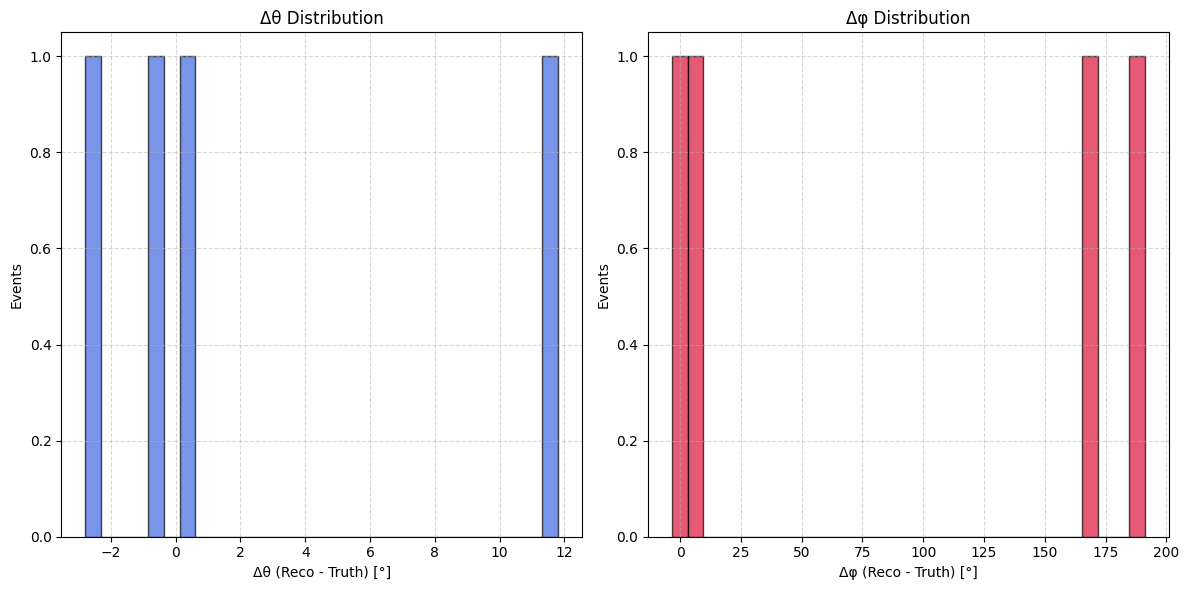

In [19]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
from sklearn.decomposition import PCA

file_path = "zdc_cosmic_muons_YZ.edm4hep.root"
events = ur.open(file_path)["events"]

# Lists to store results for ALL events
all_results = []

for event_index in range(len(events)):
    event_data = {
        "event_id": event_index,
        "status": "processed",
        "mc_theta": None,
        "mc_phi": None,
        "reco_theta": None,
        "reco_phi": None,
        "n_hits": 0,
        "reason_skipped": None
    }

    # ===== 1. MC PARTICLES =====
    gen_status = events["MCParticles/MCParticles.generatorStatus"].array()[event_index]
    if np.sum(gen_status == 1) == 0:
        event_data["status"] = "skipped"
        event_data["reason_skipped"] = "no MC truth"
        all_results.append(event_data)
        continue

    momentum_x = events["MCParticles/MCParticles.momentum.x"].array()[event_index][gen_status == 1].to_numpy()
    momentum_y = events["MCParticles/MCParticles.momentum.y"].array()[event_index][gen_status == 1].to_numpy()
    momentum_z = events["MCParticles/MCParticles.momentum.z"].array()[event_index][gen_status == 1].to_numpy()

    # MC truth angles
    event_data["mc_theta"] = np.degrees(np.arccos(abs(momentum_z[0])/np.linalg.norm([momentum_x[0], momentum_y[0], momentum_z[0]])))
    event_data["mc_phi"] = np.degrees(np.arctan2(momentum_y[0], momentum_x[0]))

    # ===== 2. HCAL HITS =====
    hcal_x = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.x"].array()[event_index].to_numpy()
    hcal_y = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.y"].array()[event_index].to_numpy()
    hcal_z = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.z"].array()[event_index].to_numpy()
    hcal_e = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.energy"].array()[event_index].to_numpy()
    
    event_data["n_hits"] = len(hcal_x)

    if len(hcal_x) < 2:
        event_data["status"] = "skipped"
        event_data["reason_skipped"] = f"<2 hits ({len(hcal_x)} hits)"
        all_results.append(event_data)
        continue

    # PCA analysis
    points = np.column_stack((hcal_x, hcal_y, -hcal_z))  # Flip z for downward direction
    weights = hcal_e / np.sum(hcal_e)
    
    try:
        weighted_mean = np.average(points, axis=0, weights=weights)
        centered = points - weighted_mean
        weighted_points = centered * np.sqrt(weights[:, np.newaxis])
        
        pca = PCA(n_components=1)
        pca.fit(weighted_points)
        direction = pca.components_[0]
        
        if direction[2] > 0:
            direction *= -1
        
        event_data["reco_theta"] = np.degrees(np.arccos(abs(direction[2])/np.linalg.norm(direction)))
        event_data["reco_phi"] = np.degrees(np.arctan2(direction[1], direction[0]))
        
    except Exception as e:
        event_data["status"] = "skipped"
        event_data["reason_skipped"] = f"PCA failed: {str(e)}"
    
    all_results.append(event_data)

# ===== 3. PRINT SUMMARY FOR ALL EVENTS =====
print(f"\n{'Event':<6} {'Status':<10} {'MC θ':<8} {'MC φ':<8} {'Reco θ':<8} {'Reco φ':<8} {'Hits':<5} {'Details':<20}")
print("-"*80)
for res in all_results:
    # Handle None values safely
    mc_theta_str = f"{res['mc_theta']:.2f}" if res['mc_theta'] is not None else "N/A"
    mc_phi_str = f"{res['mc_phi']:.2f}" if res['mc_phi'] is not None else "N/A"
    reco_theta_str = f"{res['reco_theta']:.2f}" if res['reco_theta'] is not None else "N/A"
    reco_phi_str = f"{res['reco_phi']:.2f}" if res['reco_phi'] is not None else "N/A"
    
    print(f"{res['event_id']:<6} {res['status']:<10} "
          f"{mc_theta_str:<8} "
          f"{mc_phi_str:<8} "
          f"{reco_theta_str:<8} "
          f"{reco_phi_str:<8} "
          f"{res['n_hits']:<5} "
          f"{res['reason_skipped'] or '':<20}")

# ===== 4. PLOT HISTOGRAMS (FOR PROCESSED EVENTS ONLY) =====
processed_events = [res for res in all_results if res["status"] == "processed"]
if processed_events:
    theta_diffs = [res["reco_theta"] - res["mc_theta"] for res in processed_events]
    phi_diffs = [res["reco_phi"] - res["mc_phi"] for res in processed_events]
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(theta_diffs, bins=30, color='royalblue', edgecolor='black', alpha=0.7)
    plt.xlabel('Δθ (Reco - Truth) [°]')
    plt.ylabel('Events')
    plt.title('Δθ Distribution')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.subplot(1, 2, 2)
    plt.hist(phi_diffs, bins=30, color='crimson', edgecolor='black', alpha=0.7)
    plt.xlabel('Δφ (Reco - Truth) [°]')
    plt.ylabel('Events')
    plt.title('Δφ Distribution')
    plt.grid(True, linestyle='--', alpha=0.5)
    
    plt.tight_layout()
    plt.show()
else:
    print("\nNo events were fully processed for histograms.")

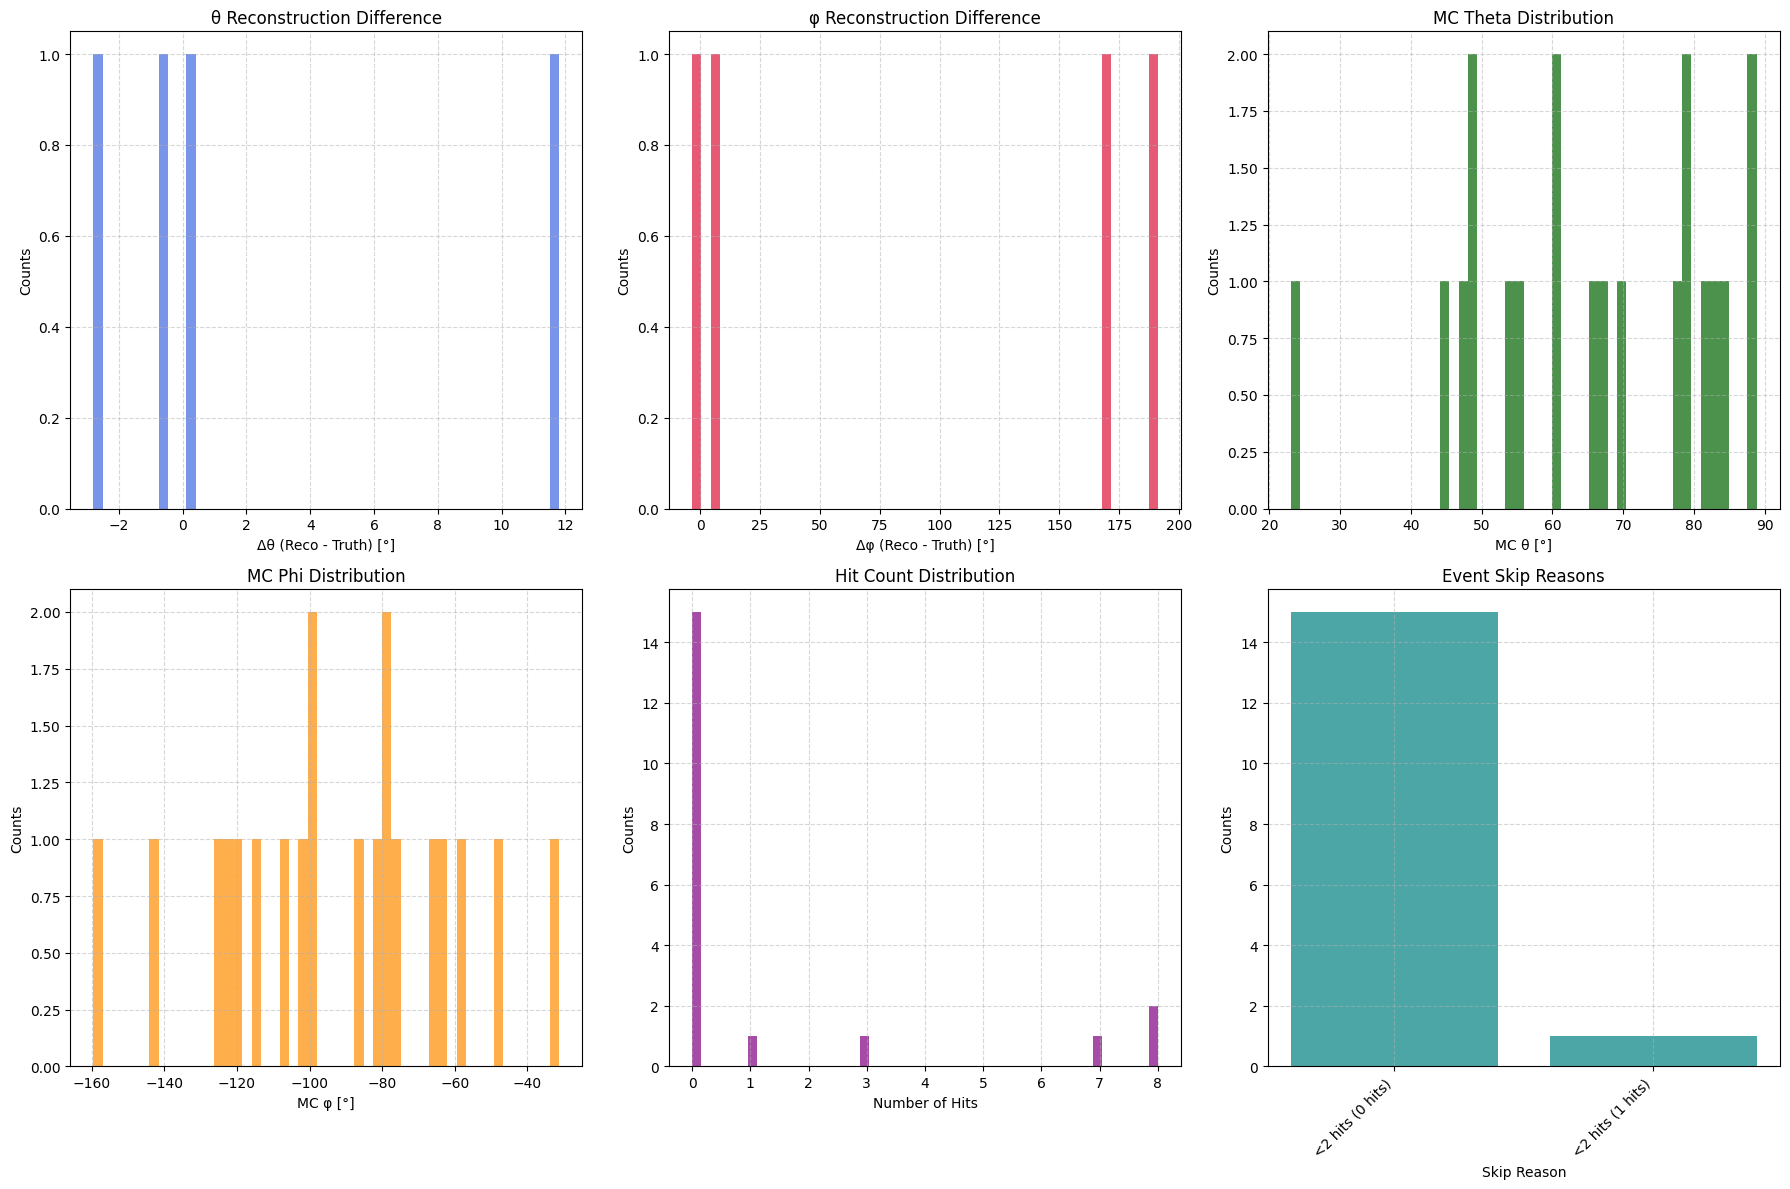


=== Statistics ===
Total events processed: 20
Events with MC truth: 20
Events with ≥2 hits: 4
Events skipped: 16

Angular resolution (RMS):
Δθ: 5.67°
Δφ: 89.84°


In [51]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
from sklearn.decomposition import PCA

file_path = "zdc_cosmic_muons_YZ.edm4hep.root"
events = ur.open(file_path)["events"]

# Lists to store results
all_mc_theta = []
all_mc_phi = []
all_reco_theta = []
all_reco_phi = []
delta_thetas = []
delta_phis = []
skipped_events = []
hit_counts = []

for event_index in range(len(events)):
    # MC particles
    gen_status = events["MCParticles/MCParticles.generatorStatus"].array()[event_index]
    if np.sum(gen_status == 1) == 0:
        skipped_events.append(("no MC truth", event_index))
        continue
    
    momentum_x = events["MCParticles/MCParticles.momentum.x"].array()[event_index][gen_status == 1].to_numpy()
    momentum_y = events["MCParticles/MCParticles.momentum.y"].array()[event_index][gen_status == 1].to_numpy()
    momentum_z = events["MCParticles/MCParticles.momentum.z"].array()[event_index][gen_status == 1].to_numpy()
    
    # MC truth angles
    mc_theta = np.degrees(np.arccos(abs(momentum_z[0])/np.linalg.norm([momentum_x[0], momentum_y[0], momentum_z[0]])))
    mc_phi = np.degrees(np.arctan2(momentum_y[0], momentum_x[0]))
    all_mc_theta.append(mc_theta)
    all_mc_phi.append(mc_phi)
    
    # HCAL hits
    hcal_x = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.x"].array()[event_index].to_numpy()
    hcal_y = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.y"].array()[event_index].to_numpy()
    hcal_z = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.z"].array()[event_index].to_numpy()
    hcal_e = events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.energy"].array()[event_index].to_numpy()
    
    hit_counts.append(len(hcal_x))
    
    if len(hcal_x) < 2:
        skipped_events.append((f"<2 hits ({len(hcal_x)} hits)", event_index))
        continue
    
    # PCA analysis
    points = np.column_stack((hcal_x, hcal_y, -hcal_z))  # Flip z for downward direction
    weights = hcal_e / np.sum(hcal_e)
    
    try:
        weighted_mean = np.average(points, axis=0, weights=weights)
        centered = points - weighted_mean
        weighted_points = centered * np.sqrt(weights[:, np.newaxis])
        
        pca = PCA(n_components=1)
        pca.fit(weighted_points)
        direction = pca.components_[0]
        
        if direction[2] > 0:
            direction *= -1
        
        reco_theta = np.degrees(np.arccos(abs(direction[2])/np.linalg.norm(direction)))
        reco_phi = np.degrees(np.arctan2(direction[1], direction[0]))
        
        all_reco_theta.append(reco_theta)
        all_reco_phi.append(reco_phi)
        delta_thetas.append(reco_theta - mc_theta)
        delta_phis.append(reco_phi - mc_phi)
        
    except Exception as e:
        skipped_events.append((f"PCA failed: {str(e)}", event_index))

# ===== PLOTTING =====
plt.figure(figsize=(18, 12))

# Plot 1: Angular differences
plt.subplot(2, 3, 1)
plt.hist(delta_thetas, bins=50, color='royalblue', alpha=0.7)
plt.xlabel('Δθ (Reco - Truth) [°]')
plt.ylabel('Counts')
plt.title('θ Reconstruction Difference')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(2, 3, 2)
plt.hist(delta_phis, bins=50, color='crimson', alpha=0.7)
plt.xlabel('Δφ (Reco - Truth) [°]')
plt.ylabel('Counts')
plt.title('φ Reconstruction Difference')
plt.grid(True, linestyle='--', alpha=0.5)

# Plot 2: MC angle distributions
plt.subplot(2, 3, 3)
plt.hist(all_mc_theta, bins=50, color='darkgreen', alpha=0.7)
plt.xlabel('MC θ [°]')
plt.ylabel('Counts')
plt.title('MC Theta Distribution')
plt.grid(True, linestyle='--', alpha=0.5)

plt.subplot(2, 3, 4)
plt.hist(all_mc_phi, bins=50, color='darkorange', alpha=0.7)
plt.xlabel('MC φ [°]')
plt.ylabel('Counts')
plt.title('MC Phi Distribution')
plt.grid(True, linestyle='--', alpha=0.5)

# Plot 3: Hit count distribution
plt.subplot(2, 3, 5)
plt.hist(hit_counts, bins=50, color='purple', alpha=0.7)
plt.xlabel('Number of Hits')
plt.ylabel('Counts')
plt.title('Hit Count Distribution')
plt.grid(True, linestyle='--', alpha=0.5)

# Plot 4: Skip reasons
if skipped_events:
    skip_reasons = [reason for reason, _ in skipped_events]
    unique_reasons, counts = np.unique(skip_reasons, return_counts=True)
    plt.subplot(2, 3, 6)
    plt.bar(unique_reasons, counts, color='teal', alpha=0.7)
    plt.xlabel('Skip Reason')
    plt.ylabel('Counts')
    plt.title('Event Skip Reasons')
    plt.xticks(rotation=45, ha='right')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Print statistics
print(f"\n=== Statistics ===")
print(f"Total events processed: {len(events)}")
print(f"Events with MC truth: {len(all_mc_theta)}")
print(f"Events with ≥2 hits: {len(delta_thetas)}")
print(f"Events skipped: {len(skipped_events)}")
print(f"\nAngular resolution (RMS):")
print(f"Δθ: {np.std(delta_thetas):.2f}°")
print(f"Δφ: {np.std(delta_phis):.2f}°")

In [ ]:
import uproot as ur
import matplotlib.pyplot as plt
import numpy as np
import awkward as ak
from sklearn.decomposition import PCA
import warnings

file_path = "zdc_cosmic_muons_YZ.edm4hep.root"

# Lists to store results
all_mc_theta = []
all_mc_phi = []
all_reco_theta = []
all_reco_phi = []
delta_thetas = []
delta_phis = []
hit_counts = []

# Open file and process events
with ur.open(file_path) as file:
    events = file["events"]
    
    # Get total number of events
    num_events = len(events["MCParticles/MCParticles.generatorStatus"].array())
    
    for event_index in range(num_events):
        # Initialize variables
        mc_theta = None
        mc_phi = None
        
        # MC particles
        gen_status = events["MCParticles/MCParticles.generatorStatus"].array()[event_index]
        gen_status_np = ak.to_numpy(gen_status)  # Convert to numpy array for comparison
        
        if np.sum(gen_status_np == 1) > 0:
            momentum_x = ak.to_numpy(events["MCParticles/MCParticles.momentum.x"].array()[event_index][gen_status_np == 1])
            momentum_y = ak.to_numpy(events["MCParticles/MCParticles.momentum.y"].array()[event_index][gen_status_np == 1])
            momentum_z = ak.to_numpy(events["MCParticles/MCParticles.momentum.z"].array()[event_index][gen_status_np == 1])
            
            if len(momentum_x) > 0:
                # Get first element (alternative to ak.first())
                momentum_x = momentum_x[0]
                momentum_y = momentum_y[0]
                momentum_z = momentum_z[0]
                
                mc_theta = np.degrees(np.arccos(abs(momentum_z)/np.linalg.norm([momentum_x, momentum_y, momentum_z])))
                mc_phi = np.degrees(np.arctan2(momentum_y, momentum_x))
                all_mc_theta.append(mc_theta)
                all_mc_phi.append(mc_phi)
        
        # HCAL hits
        hcal_x = ak.to_numpy(events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.x"].array()[event_index])
        hcal_y = ak.to_numpy(events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.y"].array()[event_index])
        hcal_z = ak.to_numpy(events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.position.z"].array()[event_index])
        hcal_e = ak.to_numpy(events["HcalFarForwardZDCHits/HcalFarForwardZDCHits.energy"].array()[event_index])
        
        hit_counts.append(len(hcal_x))
        
        # Process hits
        if len(hcal_x) > 0:
            points = np.column_stack((hcal_x, hcal_y, -hcal_z))  # Flip z for downward direction
            weights = hcal_e / np.sum(hcal_e) if np.sum(hcal_e) > 0 else np.ones(len(hcal_e))/len(hcal_e)
            
            try:
                weighted_mean = np.average(points, axis=0, weights=weights)
                centered = points - weighted_mean
                weighted_points = centered * np.sqrt(weights[:, np.newaxis])
                
                with warnings.catch_warnings():
                    warnings.simplefilter("ignore", RuntimeWarning)
                    pca = PCA(n_components=1)
                    pca.fit(weighted_points)
                    direction = pca.components_[0]
                
                if direction[2] > 0:
                    direction *= -1
                
                reco_theta = np.degrees(np.arccos(abs(direction[2])/np.linalg.norm(direction)))
                reco_phi = np.degrees(np.arctan2(direction[1], direction[0]))
                
                all_reco_theta.append(reco_theta)
                all_reco_phi.append(reco_phi)
                
                if mc_theta is not None and mc_phi is not None:
                    delta_thetas.append(reco_theta - mc_theta)
                    delta_phis.append(reco_phi - mc_phi)
                    
            except Exception as e:
                if len(hcal_x) == 1:
                    direction = np.array([hcal_x[0], hcal_y[0], -hcal_z[0]])
                    direction = direction / np.linalg.norm(direction)
                    reco_theta = np.degrees(np.arccos(abs(direction[2])/np.linalg.norm(direction)))
                    reco_phi = np.degrees(np.arctan2(direction[1], direction[0]))
                    all_reco_theta.append(reco_theta)
                    all_reco_phi.append(reco_phi)
                    if mc_theta is not None and mc_phi is not None:
                        delta_thetas.append(reco_theta - mc_theta)
                        delta_phis.append(reco_phi - mc_phi)

# ===== PLOTTING =====
plt.figure(figsize=(18, 12))

# Plot 1: Angular differences
plt.subplot(2, 3, 1)
if delta_thetas:
    plt.hist(delta_thetas, bins=50, color='royalblue', alpha=0.7)
    plt.xlabel('Δθ (Reco - Truth) [°]')
    plt.ylabel('Counts')
    plt.title('θ Reconstruction Difference')
    mean_theta = np.mean(delta_thetas)
    std_theta = np.std(delta_thetas)
    plt.axvline(mean_theta, color='k', linestyle='dashed', linewidth=1)
    plt.text(0.7, 0.9, f'Mean: {mean_theta:.2f}°\nStd: {std_theta:.2f}°', 
             transform=plt.gca().transAxes)
    plt.grid(True, linestyle='--', alpha=0.5)

# Plot 2: Phi differences
plt.subplot(2, 3, 2)
if delta_phis:
    plt.hist(delta_phis, bins=50, color='crimson', alpha=0.7)
    plt.xlabel('Δφ (Reco - Truth) [°]')
    plt.ylabel('Counts')
    plt.title('φ Reconstruction Difference')
    mean_phi = np.mean(delta_phis)
    std_phi = np.std(delta_phis)
    plt.axvline(mean_phi, color='k', linestyle='dashed', linewidth=1)
    plt.text(0.7, 0.9, f'Mean: {mean_phi:.2f}°\nStd: {std_phi:.2f}°', 
             transform=plt.gca().transAxes)
    plt.grid(True, linestyle='--', alpha=0.5)

# Plot 3: MC theta distribution
plt.subplot(2, 3, 3)
if all_mc_theta:
    plt.hist(all_mc_theta, bins=50, color='darkgreen', alpha=0.7)
    plt.xlabel('MC θ [°]')
    plt.ylabel('Counts')
    plt.title('MC Theta Distribution')
    plt.grid(True, linestyle='--', alpha=0.5)

# Plot 4: MC phi distribution
plt.subplot(2, 3, 4)
if all_mc_phi:
    plt.hist(all_mc_phi, bins=50, color='darkorange', alpha=0.7)
    plt.xlabel('MC φ [°]')
    plt.ylabel('Counts')
    plt.title('MC Phi Distribution')
    plt.grid(True, linestyle='--', alpha=0.5)

# Plot 5: Hit count distribution
plt.subplot(2, 3, 5)
plt.hist(hit_counts, bins=50, color='purple', alpha=0.7)
plt.xlabel('Number of Hits')
plt.ylabel('Counts')
plt.title('Hit Count Distribution')
plt.grid(True, linestyle='--', alpha=0.5)

# Plot 6: 2D theta correlation
plt.subplot(2, 3, 6)
if delta_thetas and delta_phis:
    plt.hist2d(all_mc_theta, all_reco_theta, bins=50, cmap='viridis')
    plt.colorbar(label='Counts')
    plt.xlabel('MC θ [°]')
    plt.ylabel('Reconstructed θ [°]')
    plt.title('Theta Correlation')
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Print statistics
print(f"\n=== Statistics ===")
print(f"Total events processed: {num_events}")
print(f"Events with MC truth: {len(all_mc_theta)}")
print(f"Events with reco angles: {len(all_reco_theta)}")
print(f"Events with both MC and reco: {len(delta_thetas)}")

if delta_thetas:
    print(f"\nAngular resolution (RMS):")
    print(f"Δθ: {np.std(delta_thetas):.2f}°")
    print(f"Δφ: {np.std(delta_phis):.2f}°")
    if len(all_mc_theta) == len(all_reco_theta):
        print(f"θ correlation coefficient: {np.corrcoef(all_mc_theta, all_reco_theta)[0,1]:.3f}")
        print(f"φ correlation coefficient: {np.corrcoef(all_mc_phi, all_reco_phi)[0,1]:.3f}")